# Исследование данных клиентов сети фитнес-центров  и разработка стратегии  по их удержанию.

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Марина! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Марат, привет! Рада знакомству!:) Иду смотреть твои комментарии!:)<i>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Привет Марина! Взаимно


**Цель исследования**

Необходимо проанализировать клиентские анкеты и на основе аналитических данных разработать план действий по удержанию клиентов. 

**Описание данных**

Мы будем работать с данными из файла, который содержит данные на месяц до оттока и факт оттока на определённый месяц:
- /datasets/gym_churn.csv.

Набор данных включает следующие поля:
- Данные клиента за предыдущий до проверки факта оттока месяц: 
  - gender — пол;
  - Near_Location — проживание или работа в районе, где находится фитнес-центр;
  - Partner — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
  - Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
  - Phone — наличие контактного телефона;
  - Age — возраст;
  - Lifetime — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента: 
  - Contract_period — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
  - Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах);
  - Group_visits — факт посещения групповых занятий;
  - Avg_class_frequency_total — средняя частота посещений в неделю за все время с начала действия абонемента;
  - Avg_class_frequency_current_month — средняя частота посещений в неделю за предыдущий месяц;
  - Avg_additional_charges_total — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
  - Churn — факт оттока в текущем месяце.
    
О качестве данных ничего не известно. Поэтому перед исследованием данных понадобится их обзор.

**Ход исследования**

Изучим общую информацию о датасете. Что можно сказать о каждом столбце? Значения какого типа они хранят? 

Проверим данные на ошибки, и оценим их влияние на исследование, затем, на этапе предобработки, изучим возможность исправить самые критичные ошибки в данных.

Далее проведем необходимые вычисления, на основании которых проанализируем данные и, таким образом, исследование пройдёт в 5 этапов:

- [Загрузка и базовый анализ данных.](#1)
- [Предобработка и исследовательский анализ данных.](#2)
- [Простроение модели прогнозирования оттока клиентов.](#3)
- [Кластеризация клиентов.](#4)
- [Общий вывод и рекомендации.](#5)

<a id="1"></a>

## Загрузка и обзор данных

In [1]:
#!pip install skimpy
#!pip install --upgrade matplotlib seaborn numpy jinja2 scipy

In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import itertools
from sklearn.metrics import silhouette_score
#from skimpy import clean_columns
from sklearn.metrics import roc_auc_score
import warnings; warnings.filterwarnings(action = 'ignore')

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:

Смотри что  можно сделать согласно PEP-8.  Если у тебя появляется pip install. Допустим:
    
    
    # pip install nltk # доустанавливаем необходимые библиотеки
    # pip install pywsd
    # pip install transformers  
    
    
    
Это значит что у нас сторонние библиотеки и значит    

    
    
    import transformers
    
итд
    
ставим в самый конец    


Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html)  подробнее  

In [3]:
# Временно отключаем предупреждения
pd.set_option('chained_assignment', 'warn')
warnings.simplefilter(action='ignore', category=[FutureWarning,UserWarning])

In [4]:
# Ограничиваем вывод числовых значений четырьмя знаками после запятой
pd.options.display.float_format = '{:,.4f}'.format

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:


Отличные настройки

In [5]:
# Чтение файла
path = '/datasets/gym_churn.csv'

if os.path.exists(path):
    gym = pd.read_csv(path)   

else:
    print('Something is wrong')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Молодец что используешь конструкцию try - except (if - else), этим ты проявляешь уважение к тем кто будет работать с твоим кодом.

</div>

In [6]:
# Выводим основную информацию по датасету gym
display(gym.head(10))
print()
gym.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.2275,5.0000,3,0.0204,0.0000,0
1,0,1,0,0,1,12,1,31,113.2029,12.0000,7,1.9229,1.9102,0
2,0,1,1,0,1,1,0,28,129.4485,1.0000,2,1.8591,1.7365,0
3,0,1,1,1,1,12,1,33,62.6699,12.0000,2,3.2056,3.3572,0
4,1,1,1,1,1,1,0,26,198.3623,1.0000,3,1.1139,1.1201,0
5,1,1,0,0,1,1,1,34,450.7440,1.0000,3,2.6235,2.6370,0
6,1,1,1,1,0,6,1,32,94.2664,6.0000,2,1.1389,1.2772,0
7,0,1,0,0,1,1,0,30,217.7866,1.0000,0,1.2135,1.0494,1
8,1,1,1,1,1,1,1,23,45.4099,1.0000,1,1.1062,1.0593,0
9,0,1,0,0,1,1,0,31,65.3108,1.0000,11,1.8109,1.9514,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   floa

В датасете gym 14 столбцов, 4000 строк.

Согласно документации к данным:
- gender — пол;
- Near_Location — проживание или работа в районе, где находится фитнес-центр;
- Partner — сотрудник компании-партнёра клуба;
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга»;
- Phone — наличие контактного телефона;
- Age — возраст;
- Lifetime — время с момента первого обращения в фитнес-центр (в месяцах);
- Contract_period — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах);
- Group_visits — факт посещения групповых занятий;
- Avg_class_frequency_total — средняя частота посещений в неделю за все время с начала действия абонемента;
- Avg_class_frequency_current_month — средняя частота посещений в неделю за предыдущий месяц;
- Avg_additional_charges_total — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;
- Churn — факт оттока в текущем месяце.

Можно было бы поменять тип данных на boolean в столбцах с бинарными показателями, но поскольку у нас в задании есть пункт оценить среднее и стандарное отклонение по столбцам, оставлю как есть. Необходимо поменять тип данных в столбце "Month_to_end_contract" на integer  и привести названия столбцов к нижнему регистру.

In [7]:
# Выводим статистическое описание данных
display(gym.describe().T)

,count,mean,std,min,25%,50%,75%,max
gender,"4,000.0000",0.5102,0.5000,0.0000,0.0000,1.0000,1.0000,1.0000
Near_Location,"4,000.0000",0.8452,0.3617,0.0000,1.0000,1.0000,1.0000,1.0000
Partner,"4,000.0000",0.4868,0.4999,0.0000,0.0000,0.0000,1.0000,1.0000
Promo_friends,"4,000.0000",0.3085,0.4619,0.0000,0.0000,0.0000,1.0000,1.0000
Phone,"4,000.0000",0.9035,0.2953,0.0000,1.0000,1.0000,1.0000,1.0000
Contract_period,"4,000.0000",4.6813,4.5497,1.0000,1.0000,1.0000,6.0000,12.0000
Group_visits,"4,000.0000",0.4123,0.4923,0.0000,0.0000,0.0000,1.0000,1.0000
Age,"4,000.0000",29.1842,3.2584,18.0000,27.0000,29.0000,31.0000,41.0000
Avg_additional_charges_total,"4,000.0000",146.9437,96.3556,0.1482,68.8688,136.2202,210.9496,552.5907
Month_to_end_contract,"4,000.0000",4.3228,4.1913,1.0000,1.0000,1.0000,6.0000,12.0000





<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: 


Думаешь о удобстве представления данных, применив метод df.T
<div>

Исходя из этих данных можно сказать следующее:
- по полу датасет распределился почти равномерно;
- средний возраст клиента фитнес-центра - 29 лет;
- средняя посещаемость не более 2 раз в неделю и в месяц;
- лайфтайм - 3-4 месяца;
- примерно половина клиентов - сотрудники компаний-партнеров;
- примерно треть клиентов использовала промо-код при оформлении контракта;
- большая часть клиентов выбрала фитнес-центр по принципу близости к дому или работе;
- на дополнительные услуги затраты небольшие, около 147 у.е. (каких, не указано) за весь период
- отток - 26,5%. 

In [8]:
'''
# Построим гистограммы для количественных столбцов нашего датасета
plt.figure(figsize=(20, 15))

gym['Age'].hist(ax=plt.subplot(4,2,1), bins=20)
plt.title('Возраст клиентов')
plt.xlabel('Возраст')
plt.ylabel('Распределение клиентов по возрасту')

gym['Lifetime'].hist(ax=plt.subplot(4,2,2), bins=20)
plt.title('Время с момента первого обращения в центр')
plt.xlabel('Время в месяцах')
plt.ylabel('Распределение по количеству месяцев')

gym['Contract_period'].hist(ax=plt.subplot(4,2,3), bins=20)
plt.title('Длительность действующего контракта')
plt.xlabel('Длительность контракта')
plt.ylabel('Распределение по длительности действия контрактов')

gym['Month_to_end_contract'].hist(ax=plt.subplot(4,2,4), bins=20)
plt.title('Срок до окончания абонемента')
plt.xlabel('Срок в месяцах')
plt.ylabel('Распределение по количеству месяцев до окончания контракта')

gym['Avg_class_frequency_total'].hist(ax=plt.subplot(4,2,5), bins=20)
plt.title('Средняя частота посещения в неделю')
plt.xlabel('Средняя частота помещения')
plt.ylabel('Распределение по посещаемости в неделю')

gym['Avg_class_frequency_current_month'].hist(ax=plt.subplot(4,2,6), bins=20)
plt.title('Средняя частота посещения в неделю за последний месяц')
plt.xlabel('Средняя частота посещения')
plt.ylabel('Распределение по посещаемости за последний месяц')

gym['Avg_additional_charges_total'].hist(ax=plt.subplot(4,2,7), bins=20)
plt.title('Суммарная выручка за другие услуги')
plt.xlabel('Суммарная выручка')
plt.ylabel('Распределение по суммарной выручке')

sns.despine()
plt.tight_layout()
plt.show()
'''

"\n# Построим гистограммы для количественных столбцов нашего датасета\nplt.figure(figsize=(20, 15))\n\ngym['Age'].hist(ax=plt.subplot(4,2,1), bins=20)\nplt.title('Возраст клиентов')\nplt.xlabel('Возраст')\nplt.ylabel('Распределение клиентов по возрасту')\n\ngym['Lifetime'].hist(ax=plt.subplot(4,2,2), bins=20)\nplt.title('Время с момента первого обращения в центр')\nplt.xlabel('Время в месяцах')\nplt.ylabel('Распределение по количеству месяцев')\n\ngym['Contract_period'].hist(ax=plt.subplot(4,2,3), bins=20)\nplt.title('Длительность действующего контракта')\nplt.xlabel('Длительность контракта')\nplt.ylabel('Распределение по длительности действия контрактов')\n\ngym['Month_to_end_contract'].hist(ax=plt.subplot(4,2,4), bins=20)\nplt.title('Срок до окончания абонемента')\nplt.xlabel('Срок в месяцах')\nplt.ylabel('Распределение по количеству месяцев до окончания контракта')\n\ngym['Avg_class_frequency_total'].hist(ax=plt.subplot(4,2,5), bins=20)\nplt.title('Средняя частота посещения в неделю

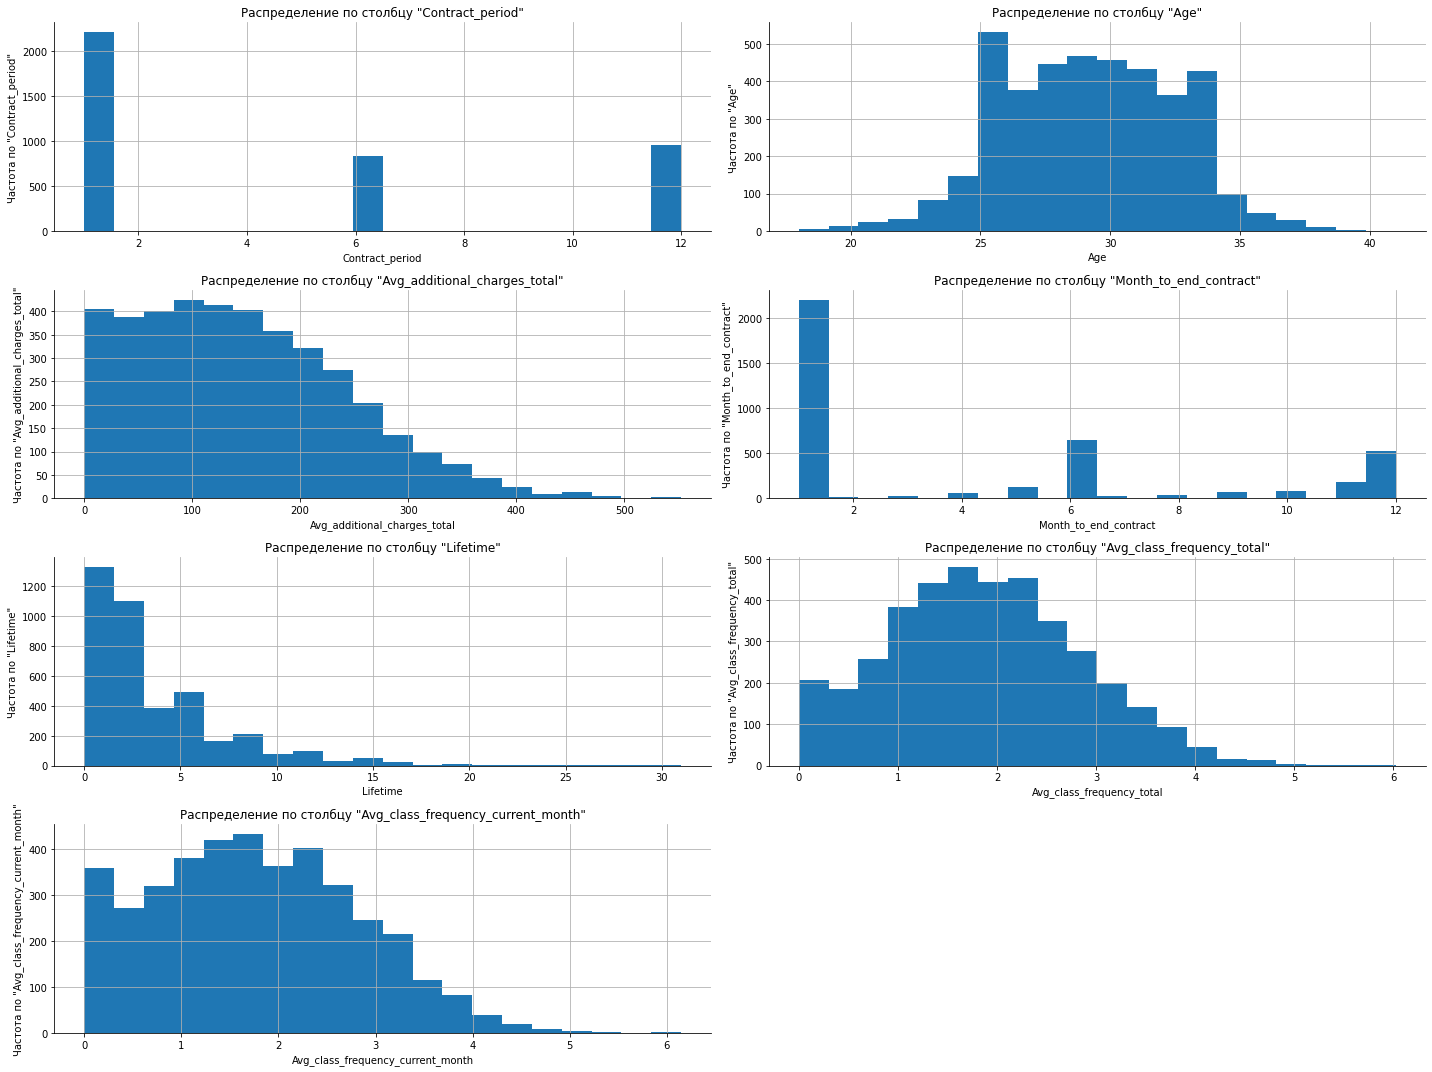

In [9]:
# Построим гистограммы для количественных столбцов нашего датасета
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

# Выберем столбцы, в которых 3 и более уникальных значений
selected_features = [feature for feature in gym.columns if gym[feature].nunique() >= 3]

# Визуализируем данные по выбранным столбцам
for i, feature in enumerate(selected_features):
    row = i // 2 # вычисление номера строки для текущего графика в сетке
    col = i % 2 # вычисление номера столбца для текущего графика в сетке
    gym[feature].hist(bins=20, ax=axes[row, col])
    axes[row, col].set_title(f'Распределение по столбцу "{feature}"')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel(f'Частота по "{feature}"')

# Скроем пустую рамку в конце вывода
for i in range(len(selected_features), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

sns.despine()
plt.tight_layout()
plt.show()

Гистограммы подтверждают предыдущий вывод. Так же мы видим, что есть клиенты, которые посещают центры очень часто, более 5 раз в неделю, некоторые явно являются постоянными клиентами больше года, можно ли считать эти наблюдения аномалиями пока непонятно.

Распределение, близкое к нормальному можно увидеть на данных столбца "age", в  столбцах "age_class_frequency_total" и "avg_class_frequency_current_month" явно присутствуют выбросы, но форма графика похожа на "колокол" нормального распределения.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



- Правильно что использовала hist только для количественных признаков + subplots.  И оформление отличное. Но всё-таки порекомендую использовать здесь цикл для более лаконичного кода
 
    
    
- Ещё можно было обратить внимание насколько нормально распределены признаки    

<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Перестроила гистограммы с помощью цикла, не сделала этого сразу из-за подписей осей и графиков, проект на русском языке  и хотелось более емко их отразить!:)
Про распределения добавила несколько строк.<i>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>


**Выводы:**

На данном этапе мы:
- Прочитали файл с данными;
- Вывели и изучили общую информацию о нем;

Впереди предобработка и анализ данных.

<a id="2"></a>

## Предобработка и исследовательский анализ данных

### Преобразуем названия стобцов

In [10]:
gym.columns = gym.columns.str.lower()

In [11]:
#gym = clean_columns(gym)




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 помнишь о стилистике


Все верно, использование .lower предпочтительно в данном случаи, (ведь нас не просят переименовать а только привести к строчному виду) так мы автоматизируем работу, впереди у нас датасеты с сотнями столбцами которые нам переделывать через .rename() будет затруднительно. 
    
    
    
 <div class="alert alert-warning">


Совет: 

     
     
Кроме того существует удобная библиотека для выполнения рутинных операций в пандасе, называемая [skimpy](https://pypi.org/project/skimpy/), в этой библиотеке доступна функция clean_column(), которая позволяет легко привести названия столбцов к соответствующему формату в одно действие     
    




<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Ух ты, какая штука интересная!
Спасибо, я не знала!:) Оставлю себе код для памяти, я попыталась с ним поработать, все супер, но установка skimpy, потребовала апгрейда ряда библиотек и код у меня поплыыыл!:)<i>
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Возможно skimpy потребовал другие версии библиотек, это вызвало проблемы уже с другими библиотеками.  Ну и бог с ним )


In [12]:
# Создадим копию датасета до преобразований
temp = gym.copy() 
len(temp)

4000

### Проверим пропуски в датасете

In [13]:
# Выведем количество пропущенных значений для датасета и отсортируем по возрастанию.
gym.isna().sum().sort_values()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

Пропущенных значений в нашем датасете нет.

### Преобразуем типы данных, где необходимо

In [14]:
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype(int)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍







### Проверим дубликаты в датасете

In [15]:
# Определим функцию для проверки данных на наличие явных дубликатов
def find_explicit_duplicates(dataset):
    
    # Находим явные дубликаты
    explicit_duplicates_cnt = display(f'Количество явных дубликатов: {dataset.duplicated().sum()}')
    
    explicit_duplicates = None
    explicit_duplicates_cnt = 0
    
    # Выводим дубликаты в виде таблицы, если они есть
    if dataset.duplicated().sum() > 0:
        explicit_duplicates = display(dataset[dataset.duplicated(keep=False)])
    
    else:
        display('Явные дубликаты не найдены')
    
    return explicit_duplicates_cnt, explicit_duplicates

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Отличная самописная функция
    
    
    

<div class="alert alert-warning">


Совет 🤔:






- Можно включить строку документации [docstring](https://dzen.ru/a/Yw02qy-7BGdhFhN3?utm_referer=yandex.ru). Для этой функции это не нужно, потому что код очевидный, а для сложный и неочевидных функций это может быть полезно 


- Код создания функции обычно оставляет под импортами, так их легче контролировать
    


In [16]:
# Проверим явные дубликаты в датасете 
dataset = gym.copy()
find_explicit_duplicates(dataset)

'Количество явных дубликатов: 0'

'Явные дубликаты не найдены'

(0, None)

Явных дубликатов нет, неявные икать в таких данных мне представляется бессмысленным занятием.

### Проверим уникальные значения в столбцах датасета

In [17]:
# Определим функцию, которая будет выводить статистику по данным в столбце, уникальные значения и их количество
def unique_describe(dataset):
    return  display(dataset.describe(), len(dataset.unique())), print(sorted(dataset.unique())) 

In [18]:
# Проанализируем данные столбца gender
dataset = gym['gender']
unique_describe(dataset)

count   4,000.0000
mean        0.5102
std         0.5000
min         0.0000
25%         0.0000
50%         1.0000
75%         1.0000
max         1.0000
Name: gender, dtype: float64

2

[0, 1]


(None, None)

В данном столбце не очень понятно какой пол подразумевается под 0, какой под 1, хотя для данного исследования это факт вряд ли имеет какое-либо значение. Среднее значение 0.51 позволяет предполагать, что в датасете почти поровну мужчин и женщин. Стандартное отклонение несильно отличается от среднего.

In [19]:
# Посчитаем, сколько клиентов каждого пола в датасете. Мы не знаем, кто зашифрован под 0 и 1, поэтому считать 
# будем обезличено.
display(len(gym.query('gender == 0')))
display(len(gym.query('gender == 1')))

1959

2041

Так и есть, разница между количеством пола 0 и пола 1 небольшая.

In [20]:
# Проанализируем данные столбца near_location
dataset = gym['near_location']
unique_describe(dataset)

count   4,000.0000
mean        0.8452
std         0.3617
min         0.0000
25%         1.0000
50%         1.0000
75%         1.0000
max         1.0000
Name: near_location, dtype: float64

2

[0, 1]


(None, None)

Среднее 0.84, стандартное отклонение 0.36. Значит в датасете перевес в сторону 1, то есть тех, кто выбрал фитнес-центр по признаку близости расположения к месту проживания или работы.

In [21]:
# Посчитаем, как разделился датасет по признаку близости фитнес-центра к месту проживания или работы
display(len(gym.query('near_location == 0')))
display(len(gym.query('near_location == 1')))

619

3381

Так и есть, объективно гораздо удобнее не ехать далеко ради занятия спортом.

In [22]:
# Проанализируем данные столбца partner
dataset = gym['partner']
unique_describe(dataset)

count   4,000.0000
mean        0.4868
std         0.4999
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: partner, dtype: float64

2

[0, 1]


(None, None)

В данном столбце среднее 0.48, стандратное отклонение несильно отличается от среднего (0.49). Небольшой перевес должен быть в сторону 0, то есть тех, кто не является сотрудником компании-партнера.

In [23]:
# Посчитаем, как разделился датасет по признаку принадлежности клиента к компании-партнеру
display(len(gym.query('partner == 0')))
display(len(gym.query('partner == 1')))

2053

1947

Так и есть, тех, кто работает в компаниях-партнерах немного меньше половины. Но вообще, это интересно, сотрудникам таких компаний, вероятно, предоставлены какие-то особые финансовые условия, скидки, промоакции, если их так много. Сеть фитнес-центров делает ставку на таких клиентов?

In [24]:
# Проанализируем данные столбца promo_friends
dataset = gym['promo_friends']
unique_describe(dataset)

count   4,000.0000
mean        0.3085
std         0.4619
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: promo_friends, dtype: float64

2

[0, 1]


(None, None)

Среднее 0.31, стандарное отклонение - 0.46, снова перекос в сторону 0, на этот раз более существенный. 

In [25]:
# Посчитаем, как разделился датасет по признаку использования промо-кодов от друзей
display(len(gym.query('promo_friends == 0')))
display(len(gym.query('promo_friends == 1')))

2766

1234

Промо-кодами от друга при оплате первого  абонемента воспользовалось меньше трети клиентов из нашего датасета.

In [26]:
# Проанализируем данные столбца phone
dataset = gym['phone']
unique_describe(dataset)

count   4,000.0000
mean        0.9035
std         0.2953
min         0.0000
25%         1.0000
50%         1.0000
75%         1.0000
max         1.0000
Name: phone, dtype: float64

2

[0, 1]


(None, None)

Среднее - 0.9, стандартное отклонение 0.3. Большинство клиентов предоставили контактный номер телефона.

In [27]:
# Посчитаем, как разделился датасет по наличию или отсутствию контактного номера телефона
display(len(gym.query('phone == 0')))
display(len(gym.query('phone == 1')))

386

3614

Контактный номер не оставили всего 386 человек из 4000. Возможно, это те, кто приходил разово потестировать сервис и не планировал продолжать ходить, или воспользовался промо-кодом от друга интереса ради.

In [28]:
# Проанализируем данные столбца group_visits
dataset = gym['group_visits']
unique_describe(dataset)

count   4,000.0000
mean        0.4123
std         0.4923
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: group_visits, dtype: float64

2

[0, 1]


(None, None)

Среднее - 0.41, стандартное отклонение - 0.49, перевес будет в сторону тех, кто не посещает групповые занятия спортом.

In [29]:
# Посчитаем, как разделился датасет по факту посещения групповых занятий
display(len(gym.query('group_visits == 0')))
display(len(gym.query('group_visits == 1')))

2351

1649

Тех, кто посещает групповые занятия спортом немногим больше трети.

In [30]:
# Проанализируем данные столбца contract_period
dataset = gym['contract_period']
unique_describe(dataset)

count   4,000.0000
mean        4.6813
std         4.5497
min         1.0000
25%         1.0000
50%         1.0000
75%         6.0000
max        12.0000
Name: contract_period, dtype: float64

3

[1, 6, 12]


(None, None)

Значения совпадают с данными из описания. Среднее - 4.7, стандартное отклонение отличается несильно - 4.6. Большая часть клиентов состоит в фитнес-центре  около 4-5 месяцев на момент анализа.

In [31]:
# Посчитаем, сколько клиентов состоят в фитнес-клубе дольше 4х месяцев
display(len(gym.query('contract_period > 4')))

1793

In [32]:
# Посчитаем, сколько клиентов состоят в фитнес-клубе меньше 4х месяцев
display(len(gym.query('contract_period < 4')))

2207

Чуть больше половины клиентов - недавно пришедшие.

In [33]:
# Проанализируем данные столбца age
dataset = gym['age']
unique_describe(dataset)

count   4,000.0000
mean       29.1842
std         3.2584
min        18.0000
25%        27.0000
50%        29.0000
75%        31.0000
max        41.0000
Name: age, dtype: float64

23

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41]


(None, None)

Среднее значение - 29.2, стандартное отклонение относительно небольшое - 3,3. Клиенты фитнес-центров - люди в возрасте от 18 до 39 лет включительно и 41-летние. Основная масса клиентов должна быть в возрасте от 26 до 32 лет.

In [34]:
# Посчитаем, сколько клиентов фитнес-центра по возрасту от 26 до 32 лет
display(len(gym.query('age > 26 & age < 32')))

2184

Так и есть, в указанный возрастной интервал попало больше половины клиентов.

In [35]:
# Проанализируем данные столбца avg_additional_charges_total
dataset = gym['avg_additional_charges_total']
unique_describe(dataset)

count   4,000.0000
mean      146.9437
std        96.3556
min         0.1482
25%        68.8688
50%       136.2202
75%       210.9496
max       552.5907
Name: avg_additional_charges_total, dtype: float64

4000

[0.1482047884566242, 0.1718623034294992, 0.2516057215197094, 0.3348235683106111, 0.3621530981063579, 0.4108930359215179, 0.4282334090256086, 0.4340871188524461, 0.5105450971712742, 0.5563518929473474, 0.682228209858522, 0.7104878214237758, 0.7965952030563983, 0.9433185865703422, 0.9722496017189286, 0.9932401239909652, 1.024875778616746, 1.1049240231521438, 1.1849406914541731, 1.2504126831117477, 1.2576737792886092, 1.3281813800655016, 1.4015965984940737, 1.5001163814980532, 1.600346951440585, 1.66205764062245, 1.754737156770652, 1.7676540990848082, 1.81774167510946, 2.0295612241212098, 2.0398125910880083, 2.180115441002087, 2.3733692624797555, 2.406023033473062, 2.5549672168390387, 2.5891702718595506, 2.6035773226769123, 2.6650163404915763, 2.769940565708368, 2.77011783812084, 2.8172002914492538, 2.919196263219064, 2.951719940857416, 3.124420547844493, 3.165889516564264, 3.2148185811108902, 3.2390719037575764, 3.2689297972969342, 3.326196494720108, 3.351133579333564, 3.3759530394664097

(None, None)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Выводить уникальные значения для столбца с количественным признаками - честно говоря это вообще не смотрится 


<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Согласна! Но в прошлых проектах часто попадались в таких столбцах ошибки, которые можно исправить было. И в целом, как посмотреть на адекватность таких данных в самом начале исследования? Я по-другому не умею!:))<i>
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Для этого и существуют для количественных признаков такие графики как hist и bocplot


Среднее - 146.9 y.e., стандартное отклонение большое - 96.4 y.e. Вероятно, есть выбросы. Чисто риторический вопрос...Что можно купить на минимальные 0.1482047884566242 y.e.? 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Жвачку )


<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Смотря, что мы подразумеваем под y.e., а то и на жвачку не наскребешь..:))<i>
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Это смотря по какому курсу )


In [36]:
# Посчитаем, сколько клиентов фитнес-центра потратили меньше 1 y.e.
display(len(gym.query('avg_additional_charges_total < 1')))

16

Всего 16 человек.

In [37]:
# Проанализируем данные столбца month_to_end_contract
dataset = gym['month_to_end_contract']
unique_describe(dataset)

count   4,000.0000
mean        4.3228
std         4.1913
min         1.0000
25%         1.0000
50%         1.0000
75%         6.0000
max        12.0000
Name: month_to_end_contract, dtype: float64

12

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


(None, None)

Среднее 4.3, стандартное отклонение - 4.1. Средний срок до окончания текущего абонемента около 4 месяцев.

In [38]:
# Посчитаем, у скольких клиентов контракт заканчивается меньше, чем через 4 месяца.
display(len(gym.query('month_to_end_contract < 4')))

2244

Пока непонятно, что нам дает эта цифра, т.к. контракты по сроку есть разные.

In [39]:
# Проанализируем данные столбца lifetime
dataset = gym['lifetime']
unique_describe(dataset)

count   4,000.0000
mean        3.7247
std         3.7493
min         0.0000
25%         1.0000
50%         3.0000
75%         5.0000
max        31.0000
Name: lifetime, dtype: float64

29

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 31]


(None, None)

Среднее - 3.7 месяца, стандартное отклонение  практически такое же. Видим, что есть "долгожители"...ходят в фитнес-центр больше 2 лет. Посмотрим, сколько вообще человек посещает эту сеть больше, например, года?

In [40]:
display(len(gym.query('lifetime > 12')))

139

Ну что ж, их не так и много. 139 из 4000.

In [41]:
# Проанализируем данные столбца avg_class_frequency_total
dataset = gym['avg_class_frequency_total']
unique_describe(dataset)

count   4,000.0000
mean        1.8790
std         0.9722
min         0.0000
25%         1.1809
50%         1.8328
75%         2.5361
max         6.0237
Name: avg_class_frequency_total, dtype: float64

3913

[0.0, 0.0027603929467316, 0.0064356961313476, 0.0088238849200099, 0.0113607681657801, 0.0147099999751787, 0.0203979476208577, 0.0242342317492818, 0.0294275662078662, 0.0300240608683926, 0.0334740806984448, 0.0362620972576015, 0.0399146135100574, 0.0405876625295573, 0.0469529682346874, 0.0523359969447463, 0.0535194304314057, 0.0549500673658516, 0.0551404285029448, 0.0562895443739186, 0.0601244587849647, 0.0630147529820188, 0.0635405347079665, 0.0643430221319385, 0.0650750070018071, 0.0739321443548739, 0.0780588715610042, 0.0818335935114742, 0.0853871397654599, 0.0870855030614501, 0.0998659390902994, 0.1019402712748764, 0.104018576978931, 0.1135069170859455, 0.1135925577652277, 0.1143339952978666, 0.1148628903693342, 0.1187338755972613, 0.1207135123383675, 0.1242749795613678, 0.1252556142883123, 0.1263817615280951, 0.1264359750336461, 0.1345718688606987, 0.135004531273543, 0.1351781197579269, 0.1370193889505249, 0.1391528451405006, 0.1413872144442829, 0.1429132259084804, 0.14343142266737

(None, None)

Среднее - 1.9, стандартное отклонение отличается примерно в 2 раза - 0.97. Разброс очень большой.

In [42]:
# Посчитаем тех, кто ходит 1-2 раза в неделю
display(len(gym.query('avg_class_frequency_total > 1 & avg_class_frequency_total < 2')))

1498

In [43]:
# Посчитаем тех, кто ходит чаще 2х раз в неделю
display(len(gym.query('avg_class_frequency_total > 2')))

1755

In [44]:
# Посчитаем тех, кто ходит реже 1 раза в неделю
display(len(gym.query('avg_class_frequency_total < 1')))

747

Тех, кто ходит 1-2 раза в неделю примерно треть, но довольно много тех, кто ходит очень редко.

In [45]:
# Посмотрим выборочно на значения меньше 1
gym.query('avg_class_frequency_total == 0.0027603929467316')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
1214,0,1,0,0,0,1,0,30,384.3710,1,7,0.0028,0.0000,0


Эти цифры вызывают вопросы, например, 0.0028, лайфтайм у клиента 7 месяцев. Даже если предположить, что он пришел всего 1 раз, то 1/(4\*7) = 0.03 примерно. Непонятно, ошибка ли это в данных, или имеющиеся данные не позволяют видеть полную схему расчета среднего. 

In [46]:
# Проанализируем данные столбца avg_class_frequency_current_month
dataset = gym['avg_class_frequency_current_month']
unique_describe(dataset)

count   4,000.0000
mean        1.7671
std         1.0529
min         0.0000
25%         0.9630
50%         1.7196
75%         2.5103
max         6.1468
Name: avg_class_frequency_current_month, dtype: float64

3820

[0.0, 0.0028723624189406, 0.0032735656800802, 0.0044478774945923, 0.0054923781012502, 0.0063979878928257, 0.0067318077542071, 0.0067906227103982, 0.0072311580663246, 0.0083846055171468, 0.0092440811667241, 0.0105157083168308, 0.012578705130274, 0.0127942747777363, 0.0128250159706654, 0.0137878683240488, 0.0209663261354782, 0.0243414415886965, 0.02586443592658, 0.0283909088114464, 0.0323483947775662, 0.033128608595573, 0.0333105298965583, 0.0379948301323616, 0.0394822931461452, 0.0407645072312134, 0.0427397248009584, 0.0430830077964219, 0.0468699914533376, 0.0497668866403027, 0.0507909023144004, 0.0530303516574956, 0.0533547632423859, 0.0541583722520256, 0.0545399901999855, 0.0545917608875756, 0.054889036929946, 0.0553424400600378, 0.0554023718046605, 0.0569578676464402, 0.0593731516476707, 0.0594962201017318, 0.0605090453089752, 0.0615915036117126, 0.0617865004304534, 0.0645658511975184, 0.0660738776186351, 0.0681049199024772, 0.0705522308485679, 0.0731734155858108, 0.0732759271825014,

(None, None)

Среднее - 1.77, стандартное отклонение - 1.05. Тот же самый вопрос возникает относительно значений, что и по предыдущему столбцу.

In [47]:
# Посчитаем тех, кто ходил 1-2 раза в неделю за предыдущий месяц
display(len(gym.query('avg_class_frequency_current_month > 1 & avg_class_frequency_current_month < 2')))

1311

In [48]:
# Посчитаем тех, кто ходил чаще 2х раз в неделю за предыдущий месяц
display(len(gym.query('avg_class_frequency_current_month > 2')))

1646

In [49]:
# Посчитаем тех, кто ходил реже 1 раза в неделю за предыдущий месяц
display(len(gym.query('avg_class_frequency_current_month < 1')))

1043

В данном столбце значения разделились более равномерно. Тех, кто, видимо, вообще не ходил  - 1043 человека.

In [50]:
# Проанализируем данные столбца churn
dataset = gym['churn']
unique_describe(dataset)

count   4,000.0000
mean        0.2652
std         0.4415
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: churn, dtype: float64

2

[0, 1]


(None, None)

Среднее - 0.27, стандартное отклонение - 0.44, сильный перевес будет в сторону тех, кто посещал фитнес-центр в текущем месяце.

In [51]:
# Посчитаем, как разделился датасет по факту посещения фитнес-центра в текущем месяце
display(len(gym.query('churn == 0')))
display(len(gym.query('churn == 1')))

2939

1061

В текущем месяце примерно четверть клиентов из нашего датасета фитнес-центр не посещала. 

### Посмотрим на средние значения признаков по двум группам - тех, кто ушел, и тех, кто остался

Сделаем группировку по двум группам - тех, кто ушел (отток) и тех, кто остался и посмотрим средние значения признаков по группам.

In [52]:
churn_means = gym.groupby('churn').mean().T
churn_means

churn,0,1
gender,0.5100,0.5108
near_location,0.8731,0.7681
partner,0.5342,0.3553
promo_friends,0.3535,0.1838
phone,0.9037,0.9029
contract_period,5.7472,1.7286
group_visits,0.4641,0.2686
age,29.9765,26.9896
avg_additional_charges_total,158.4457,115.0829
month_to_end_contract,5.2831,1.6626


Изучив средние значения по группам, предварительно можно сказать, что:

- распределения по полу, наличию контактного номера, практически равномерные, они, вероятнее всего, не влияют на отток;
- близость к работе или месту проживания влияет незначительно (разница примерно в 10%);
- среди тех, кто работает в компаниях-партнерах, оставшихся больше, чем ушедших примерно на 18%;
- среди тех, кто пришел по промо-коду от друга осталось больше тех, кто заключил контракт дольше, чем на месяц;
- посетители групповых занятий меньше попали в отток (на 20%);
- возраст тоже оказывает влияние на отток, в среднем клиенты после 29 лет чаще продолжают посещать фитнес, чем 26ти-летние;
- контракты на более длительный срок показывают меньшую вероятность оттока, чем краткосрочные;
- также те, кто посещает фитнес-центр более 4 месяцев, вероятно, уже выработали привычку, и реже подвержены оттоку.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Все расписано, увидено )
    
</div>

### Визуализация признаков для тех, кто ушел, и тех, кто остался

In [53]:
# Определим функцию для построения столбчатых гистограмм и диаграмм размаха для столбцов с 
# числовыми данными, по которым можно построить "читабельное" распределение 
def plots_for_numerical_data(data, feature, target_feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
    
    # Построение гистограмм
    sns.histplot(data=data[data[target_feature]==0][feature], ax=axes[0], label='Оставшиеся клиенты',
                 kde=True, alpha=0.5, color='blue', bins=20)
    sns.histplot(data=data[data[target_feature]==1][feature], ax=axes[0],label='Ушедшие клиенты', 
                 kde=True, color='green', bins=20)
    axes[0].set_title(f'Распределение для признака "{feature}"')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Частота')
    axes[0].legend()
    
    # Построение диаграммы размаха
    sns.boxplot(data=data, x=target_feature, y=feature, hue=target_feature, ax=axes[1], palette='viridis') 
    axes[1].set_title(f'Диаграмма размаха для признака "{feature}"')
    axes[1].set_xlabel('Отток')
    axes[1].set_ylabel(feature)  
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(['Оставшиеся клиенты', 'Ушедшие клиенты'])
    
    plt.suptitle(f'Анализ признака "{feature}"', y=1.02, fontsize=16)
    
    sns.despine()
    plt.tight_layout()    
    plt.show()   

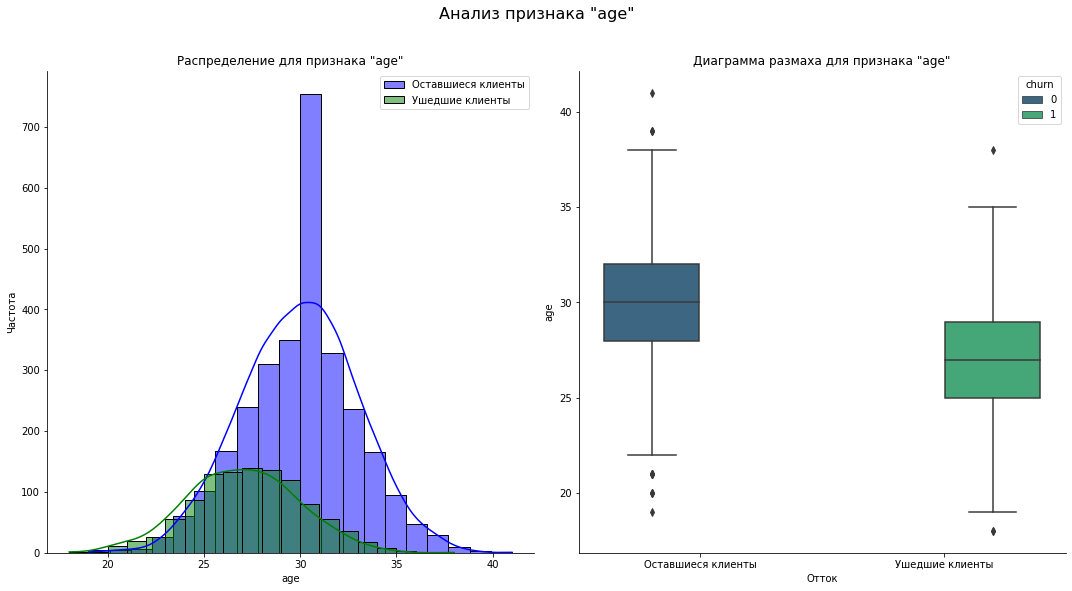

In [54]:
# Построим визуализации для признака "age" для тех, кто ушел (отток) и тех, кто остался (не попали в отток)
plots_for_numerical_data(gym, 'age', 'churn')


<div class="alert alert-success">
<font size="5">
<b>Комментарий ревьюера</b></font>





Успех:

    
Прекрасно    
    
Большой плюс за то что для количественных признаков использованы как гистограммы, так и ящика с усами, ведь:

- Гистограмма позволяет вам визуально оценить форму распределения данных. Она особенно полезна для выявления бимодальности - наличия двух характерных мод в данных. Гистограмма позволяет увидеть, есть ли две выраженные вершины (пики) в данных, что может указывать на наличие двух различных групп в данных.

- Ящик с усами отлично подходит для выявления выбросов и оценки разброса данных. Он обнаруживает асимметрии и позволяет оценить наличие выбросов, которые не всегда легко заметить на гистограмме.



Больше всего оставшихся клиентов находятся в возрасте от 23 до 38 лет, средний возраст - 30 лет, среди ушедших возрастной интервал от 19 до 35, средний возраст - 27-28 лет. Вероятно, возраст оказывает определенное влияние на отток, уходят люди более молодого возраста. Думаю, что возраст моложе 20 и страрше 38 это своего рода аномалии.

In [55]:
# Сгруппируем данные по возрасту, посмотрим численное распределение клиентов по возрасту
display(gym.groupby('age').agg({'age':'count'}).T)

# Cнимем ограничение на количество столбцов
pd.set_option('display.max_columns', 50)

age,18,19,20,21,22,23,24,25,26,27,...,31,32,33,34,35,36,37,38,39,41
age,2,2,14,24,33,82,148,231,300,378,...,434,364,253,174,98,48,29,10,3,1


Так и есть, клиентов до 20 лет и старще 38 крайне мало. Возможно, стоит удалить эти данные как аномалии. Пока оставим как есть.

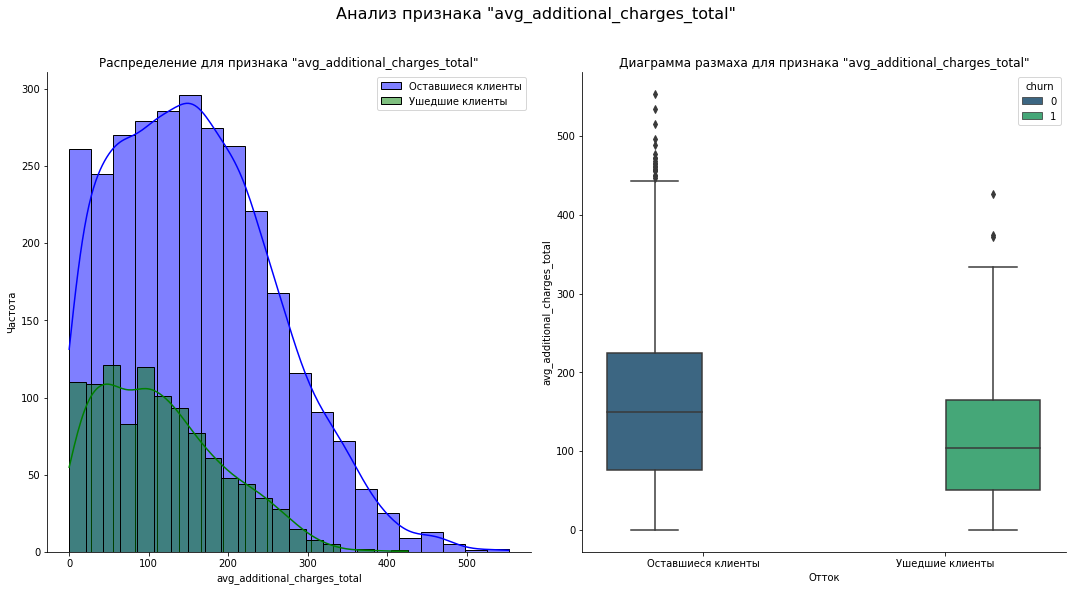

In [56]:
# Построим визуализации для признака "avg_additional_charges_total" для тех, кто ушел (отток) и тех, кто остался 
# (не попали в отток)
plots_for_numerical_data(gym, 'avg_additional_charges_total', 'churn')

Оставшиеся клиенты тратят на дополнительные услуги в среднем немного больше ушедших (150 y.e. против 110 y.e.), это даже интересно. Получается, что те, кто посещает фитнес-центр долго разово скорее всего тратят меньше, чем те, кто посещал его недолго. Оставшиеся редко тратят больше 450 y.e., ушедшие - больше 350. Выше 450 y.e. мы видим выбросы.

In [57]:
# Посмотрим на количество людей, потративших более 450 y.e.
display(len(gym.query('avg_additional_charges_total > 450')))
gym.query('avg_additional_charges_total > 450')

18

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
5,1,1,0,0,1,1,1,34,450.7440,1,3,2.6235,2.6370,0
483,0,1,0,0,1,1,0,28,455.1732,1,5,2.0924,2.1546,0
761,0,1,0,0,1,1,1,27,472.3189,1,5,3.5475,3.7551,0
822,0,1,1,1,1,1,1,29,460.9040,1,10,3.1578,3.1549,0
975,0,0,1,0,1,12,1,32,552.5907,12,1,0.8879,0.9393,0
999,0,1,1,1,1,12,1,28,457.4065,9,1,1.7181,1.6559,0
1400,1,1,0,0,1,6,1,31,462.1787,5,0,2.5046,2.4535,0
1597,0,0,0,0,1,6,0,31,471.7200,6,21,3.2841,3.2949,0
1756,1,1,0,0,1,1,1,30,456.8610,1,2,1.9373,2.0110,0
1797,0,1,1,0,0,1,0,27,496.1722,1,6,1.6308,1.6202,0


Таких клиентов всего 18, но интересно то, что у 10 из них котракты по 1 месяцу, даже у тех, у кого контракты более длительные, сроки до окончания контракта очень большое, ощущение, что большинство из них новенькие, хотя лайфтаймы есть по 6, 10, 14 и даже 21 месяц при месячных контрактах. Получается, они начинают ходить, потом бросают, через какое-то время снова возращаются на месяц и т.д. Все они в возрасте от 26 до 34 лет, явно любят групповые тренировки и что-то мне подсказывает, что 0 в столбце gender - это все-таки женщины (14 из 18)...

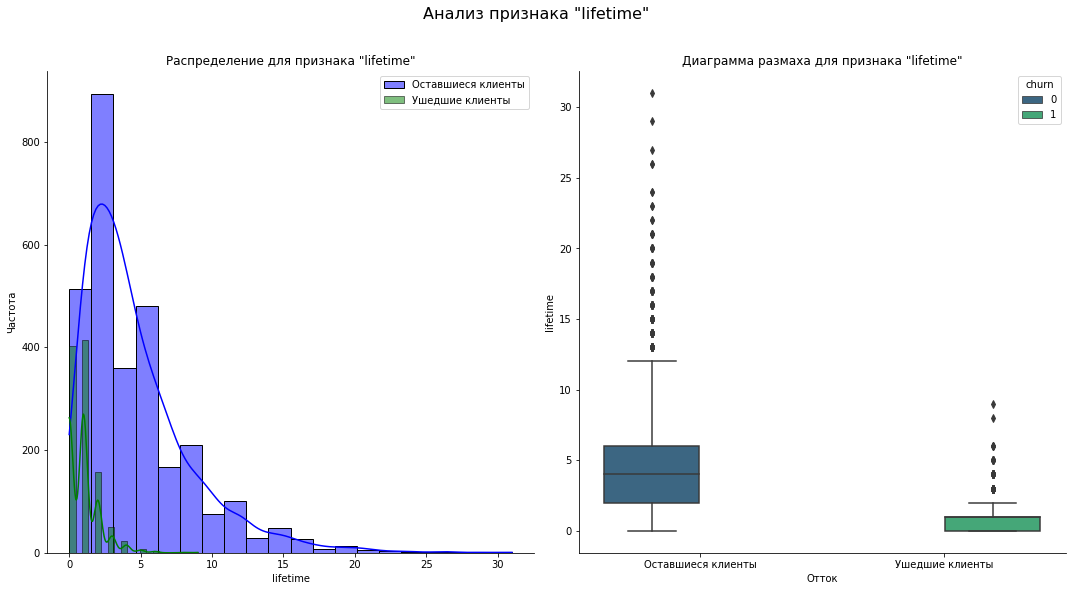

In [58]:
# Построим визуализации для признака "lifetime" для тех, кто ушел (отток) и тех, кто остался (не попали в отток)
plots_for_numerical_data(gym, 'lifetime', 'churn')

Средний лайфтайм у ушедших клиентов сильно отличается от тех, кто остался (1 месяц против 3-4х месяцев). Среди ушедших мало кто задержался более, чем на 2.5 месяцев, основная масса оставшихся задержалась в фитнес-центре не более года. Судя по правому "хвосту" гистограммы после 15 месяцев будут выбросы.

In [59]:
# Посчитаем количество клиентов с лайфтаймом более 15 месяцев
len(gym.query('lifetime > 15'))

63

63 клиента из 4000, около 1.5%  "долгожителей".

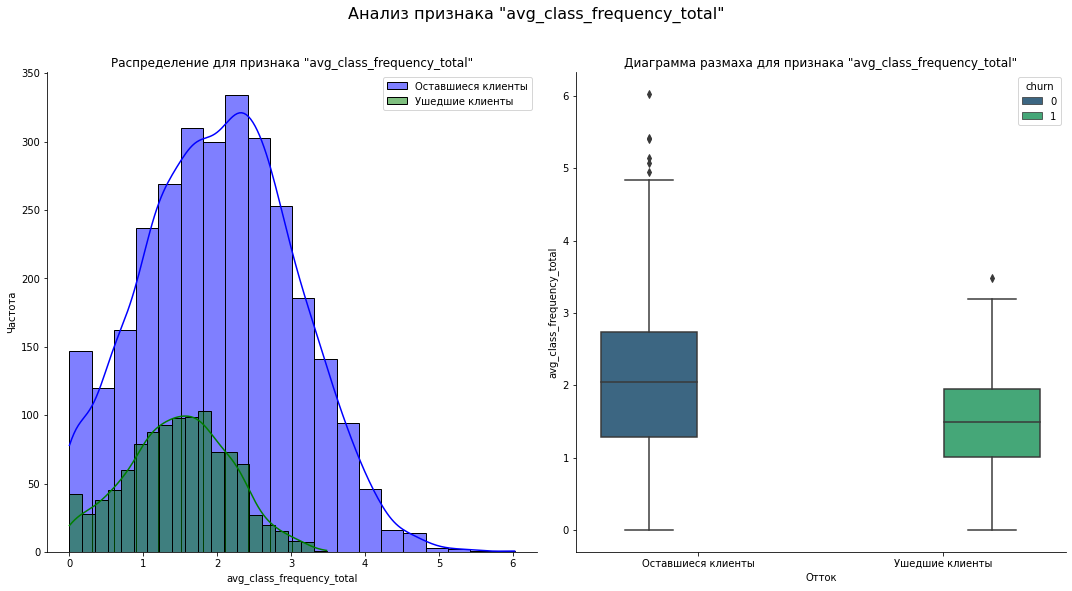

In [60]:
# Построим визуализации для признака "avg_class_frequency_total" для тех, кто ушел (отток) и тех, кто остался 
# (не попали в отток)
plots_for_numerical_data(gym, 'avg_class_frequency_total', 'churn')

Средняя частота посещений в неделю у оставшихся клиентов - 2.1 раза в основном интервале до примерно 4.8 раз, у ушедших, примерно 1.6 раза в оновном интервале до 3.3 раз. Те, кто ходит более 5 раз в неделю - редкость.

In [61]:
# Посчитаем количество клиентов, посещающих фитнес-центр более или равно 5 раз в неделю
len(gym.query('avg_class_frequency_total >= 5'))

5

Таких буквально единицы - 5 человек. 

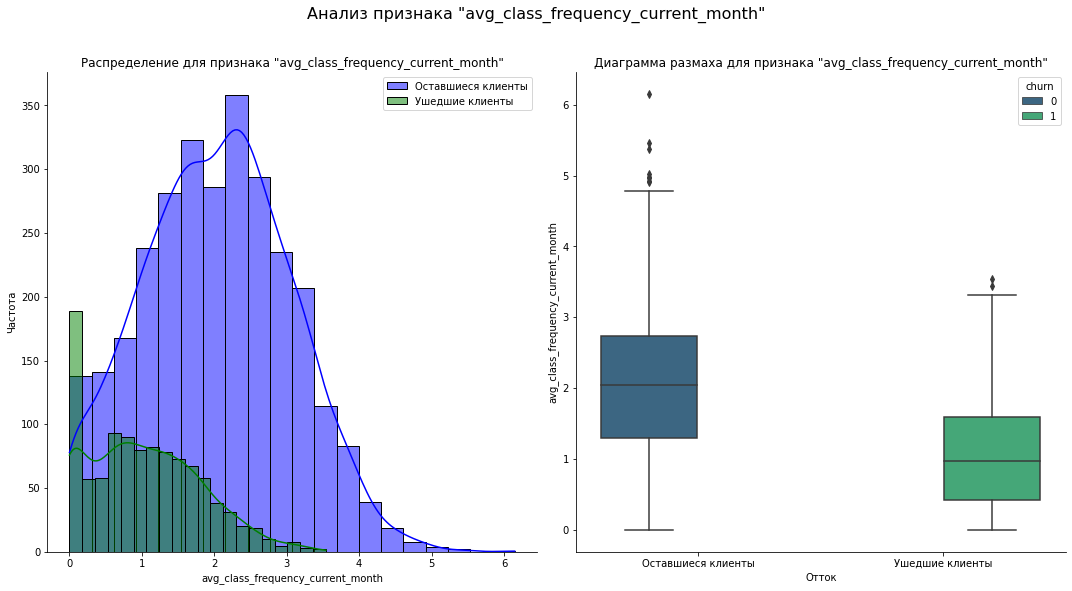

In [62]:
# Построим визуализации для признака "avg_class_frequency_current_month" для тех, кто ушел (отток) и тех, кто 
# остался (не попали в отток)
plots_for_numerical_data(gym, 'avg_class_frequency_current_month', 'churn')

Средняя частота посещений за предыдущий месяц у оставшихся так же как на прошлой визуализации осталась 2.1 раза, а вот у ушедших снизилась до 1 раза в неделю.

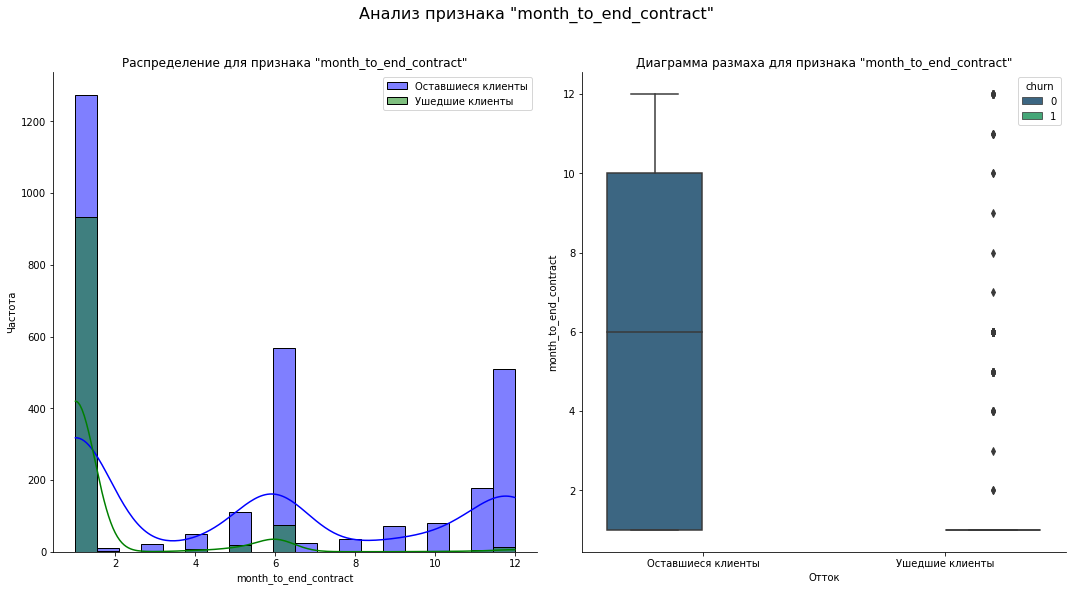

In [63]:
# Построим визуализации для признака "month_to_end_contract" для тех, кто ушел (отток) и тех, кто остался 
# (не попали в отток)
plots_for_numerical_data(gym, 'month_to_end_contract', 'churn')

По обеим группам мы видим три пика 1, 6, 12 месяцев, вероятно, это связано с длительностью имеющихся в фитнес-центре контрактов. Оставшиеся клиенты в среднем имеют контракты, до окончания которых еще около полугода. Большая часть ушедших не задержалась более месяца. 

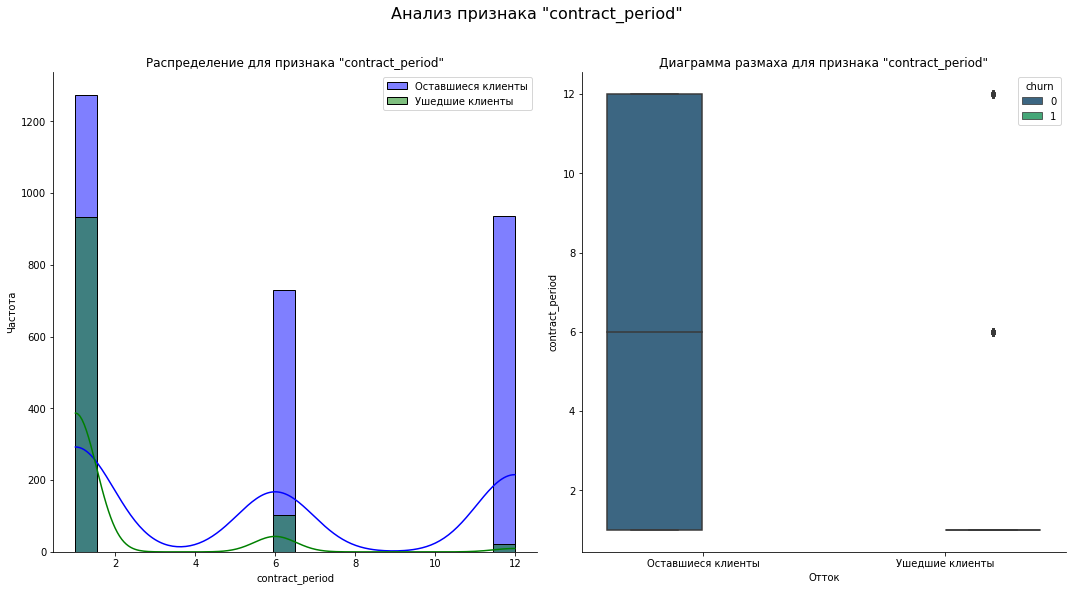

In [64]:
# Построим визуализации для признака "contract_period" для тех, кто ушел (отток) и тех, кто остался 
# (не попали в отток)
plots_for_numerical_data(gym, 'contract_period', 'churn')

Оставшиеся клиенты в среднем заключают контракты на полгода, ушедшие в среднем на месяц, но если контракт заключен на длительный срок, то ушедших к окончанию контракта очень немного, основной отток происходит все-таки после первого месяца.

Посчитаем 95-й и 99-й перцентили по проанализированным выше столбцам.

In [65]:
# Выберем только те столбцы, где уникальных значений больше 12 (исключим столбцы с бинарными значениями и столбцы 
# contract_period и month_to_end_contract)
selected_columns = [feature for feature in gym.columns if gym[feature].nunique() > 12]

# Подсчет 95 и 99 перцентилей для каждого выбранного столбца
for feature in selected_columns:
    percentile_95 = np.percentile(gym[feature], 95)
    percentile_99 = np.percentile(gym[feature], 99)
    
    # Вывод результатов для каждого столбца
    print(f'Столбец: {feature}')
    print(f'95 перцентиль: {percentile_95}')
    print(f'99 перцентиль: {percentile_99}\n')

Столбец: age
95 перцентиль: 34.0
99 перцентиль: 37.0

Столбец: avg_additional_charges_total
95 перцентиль: 323.44087589030966
99 перцентиль: 400.9961250467456

Столбец: lifetime
95 перцентиль: 11.0
99 перцентиль: 17.0

Столбец: avg_class_frequency_total
95 перцентиль: 3.5356483663210474
99 перцентиль: 4.197579250683466

Столбец: avg_class_frequency_current_month
95 перцентиль: 3.549061541419111
99 перцентиль: 4.185757787657458



В целом, 99%ый перцентиль подтверждает предыдущие выводы о выбросах. Я удалю строки по этой границе.

In [66]:
# Проверим размер датасета до удаления выбросов
gym.shape

(4000, 14)

In [67]:
for feature in selected_columns:
    percentile_99 = np.percentile(gym[feature], 99)
    gym = gym[gym[feature] <= percentile_99]

In [68]:
# Проверим размер датасета после удаления выбросов
gym.shape

(3831, 14)

In [69]:
# Определим функцию для построения столбчатых диаграмм и диаграмм размаха для столбцов с 
# бинарным распределением
def plots_for_binary_data(data, feature, target_feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
    
    # Построение столбчатой диаграммы
    sns.countplot(data=data, x=feature, hue = target_feature, ax=axes[0], palette='viridis')
    axes[0].set_title(f'Столбчатая диаграмма для признака "{feature}"')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Частота')
    axes[0].legend(['Оставшиеся клиенты', 'Ушедшие клиенты'])

    # Подготовка данных для круговой диаграммы
    feature_target = data.groupby([feature, target_feature]).size().unstack().fillna(0)
    labels = feature_target.index

    # Построение круговой диаграммы
    ax = axes[1]
    width = 0.4
    offset = 0.6
   
    for churn_value in feature_target.columns:
        sizes = feature_target[churn_value]
        # Определение цветов
        colors = ['blue' if (f == 0 and churn_value == 0) else 'lightblue' if f == 0 else 'green' if 
                  churn_value == 0 else 'lightgreen' for f in labels]
        ax.pie(sizes, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16}, colors=colors, radius=1, 
           wedgeprops=dict(width=width, edgecolor='w'), center=(0.5 + offset, 0.5), pctdistance=0.9, 
                                          labeldistance=1.2)
        width -= 0.2 
        offset += 0.8
        axes[1].set_title(f'Круговая диаграмма для признака "{feature}"')
        axes[1].set_xlabel('')
        axes[1].set_ylabel('')
        axes[1].legend([f'{feature} 0: Оставшиеся клиенты', f'{feature} 1: Оставшиеся клиенты',
                       f'{feature} 0: Ушедшие клиенты', f'{feature} 1: Ушедшие клиенты'], loc='lower right',
                       ncol=2)
  
    plt.suptitle(f'Анализ признака "{feature}"', y=1.02, fontsize=16)
    
    sns.despine()
    plt.tight_layout()    
    plt.show()   

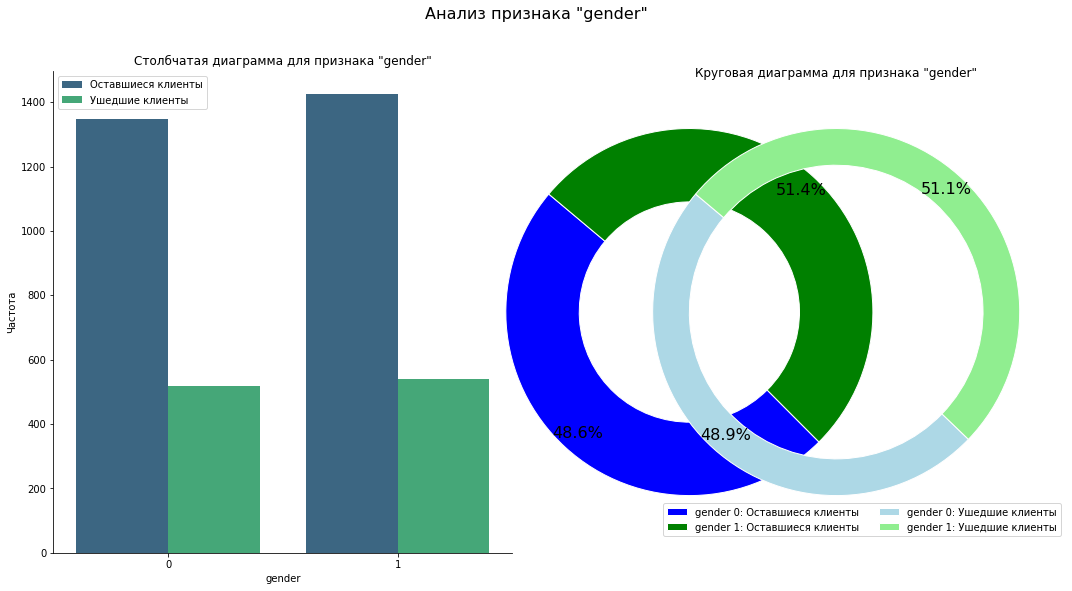

In [70]:
# Построим визуализации для признака "gender" для тех, кто ушел (отток) и тех, кто остался 
# (не попали в отток)
plots_for_binary_data(gym, 'gender', 'churn')

На столбчатой диаграмме признака gender видно, что  оставшихся больше примерно на 2/3, чем ушедших. Распределение оттока по полу практически одинаковое. Круговая диаграмма показывает нам, что среди общего числа оставшихся примерно 48.5 нулей (предпроложительно, женщин) и 51.4% единичек (мужчин). Среди ушедших 48.9% нулей и 51.1% единиц, соответственно. Думаю, данный признак на отток не влияет.

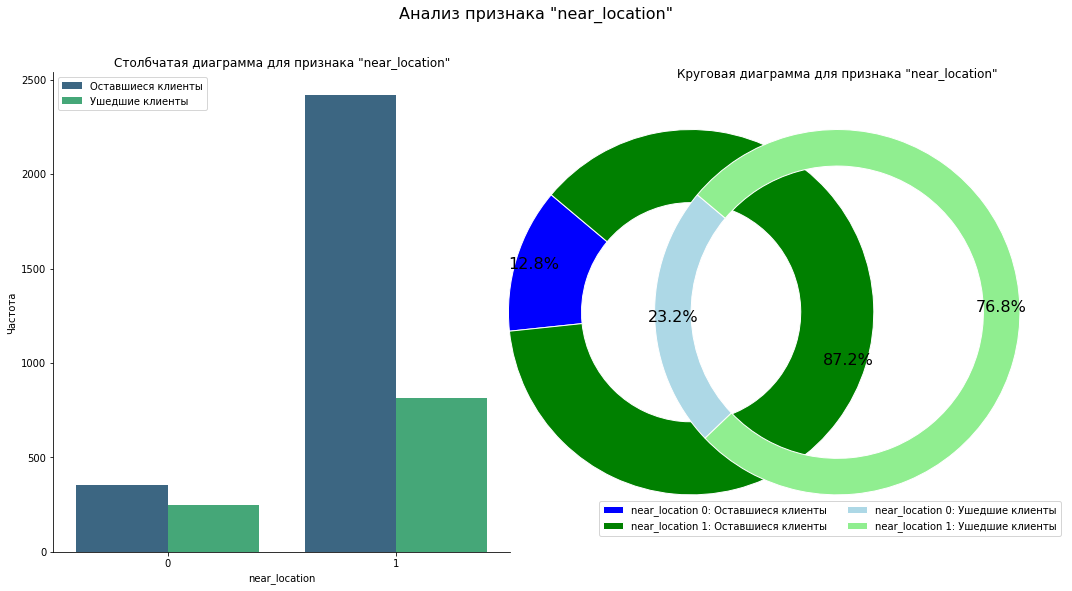

In [71]:
# Построим визуализации для признака "near_location" для тех, кто ушел (отток) и тех, кто остался 
# (не попали в отток)
plots_for_binary_data(gym, 'near_location', 'churn')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



И тут прекрасное оформление.  Верно что для разных типов данных строишь разные типы графиков

Среди тех, у кого фитнес-центр находился в удобной для посещения локации оставшихся намного больше, чем ушедших. Среди оставшихся фитнес-центр рядом с домой или работой у 87,2% клиентов. Но и среди ушедших - у 76.8% он рядом. Похоже, этот признак играет определенную роль в анализе оттока клиентов, но не саму важную.

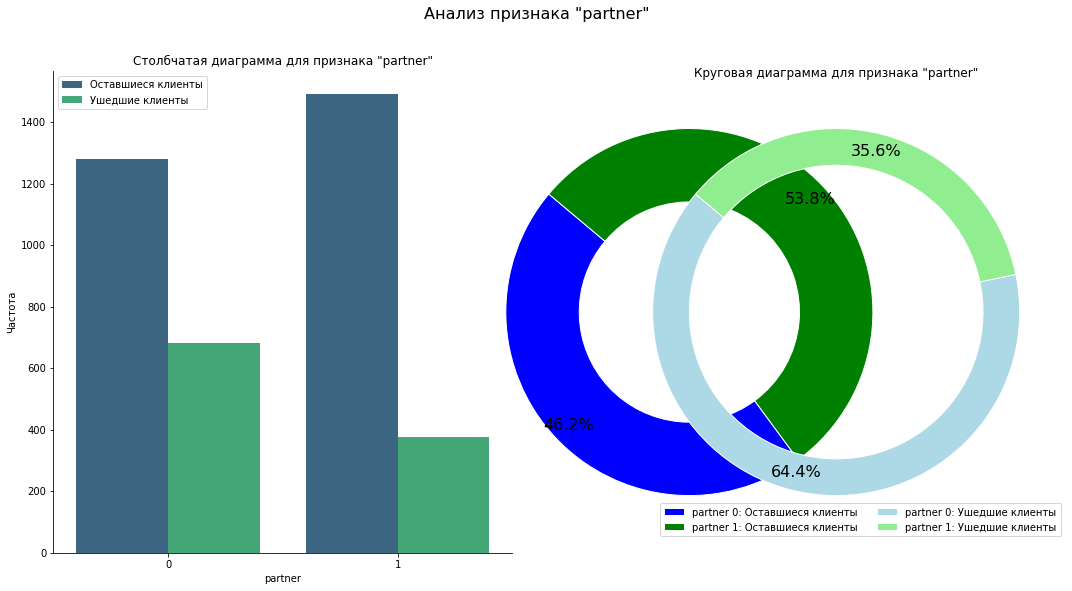

In [72]:
# Построим визуализации для признака "partner" для тех, кто ушел (отток) и тех, кто остался 
# (не попали в отток)
plots_for_binary_data(gym, 'partner', 'churn')

Ушедших среди тех, кто не является сотрудником компании-партнера примерно в половину больше. Оставшихмя клиентов, пришедших от компаний-партнеров - 53.8%, ушедших - 35.6%. Среди клиентов не от партнеров ушедших - 64.4%, оставшихся 46.2%. Похоже, что признак важен для анализа оттока. Возможно, для сотрудников компаний-партнеров действуют специальные предложения, или, например, фитнесс входит в социальный пакет.

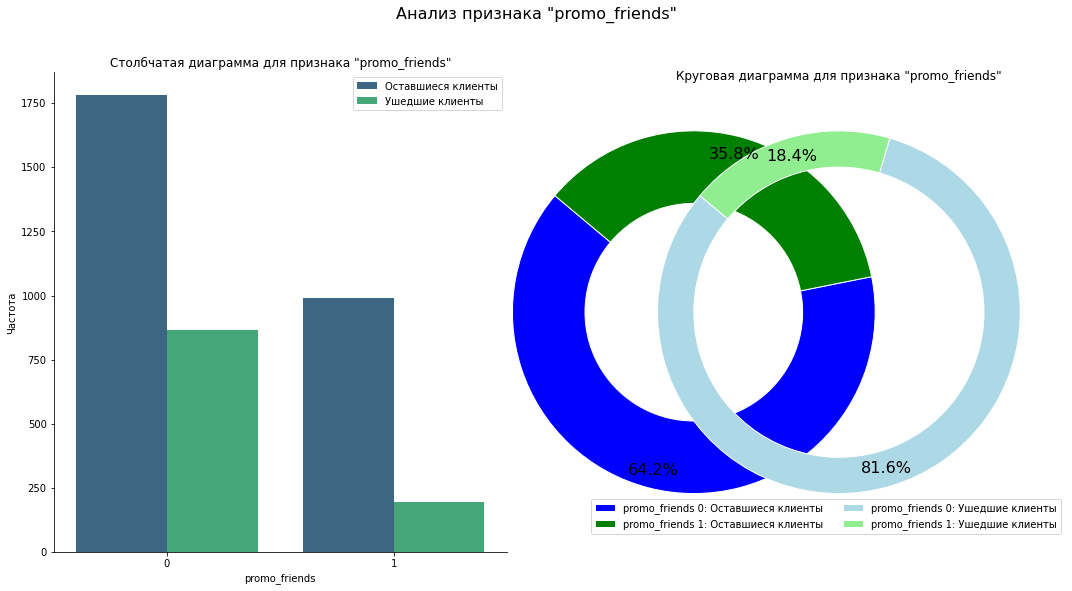

In [73]:
# Построим визуализации для признака "promo_friends" для тех, кто ушел (отток) и тех, кто остался 
#(не попали в отток)
plots_for_binary_data(gym, 'promo_friends', 'churn')

Воспользовавшиеся промо-кодом от друга уходят на 3/4 реже. Оставшихся клиентов без промо-кода 64.2%, оставшихся с промокодом 35.8%. Ушедших без промо-кода - 81.6%, ушедших с промо-кодом - 18.4%. Определенно, наличие промо-кода влияет на отток.

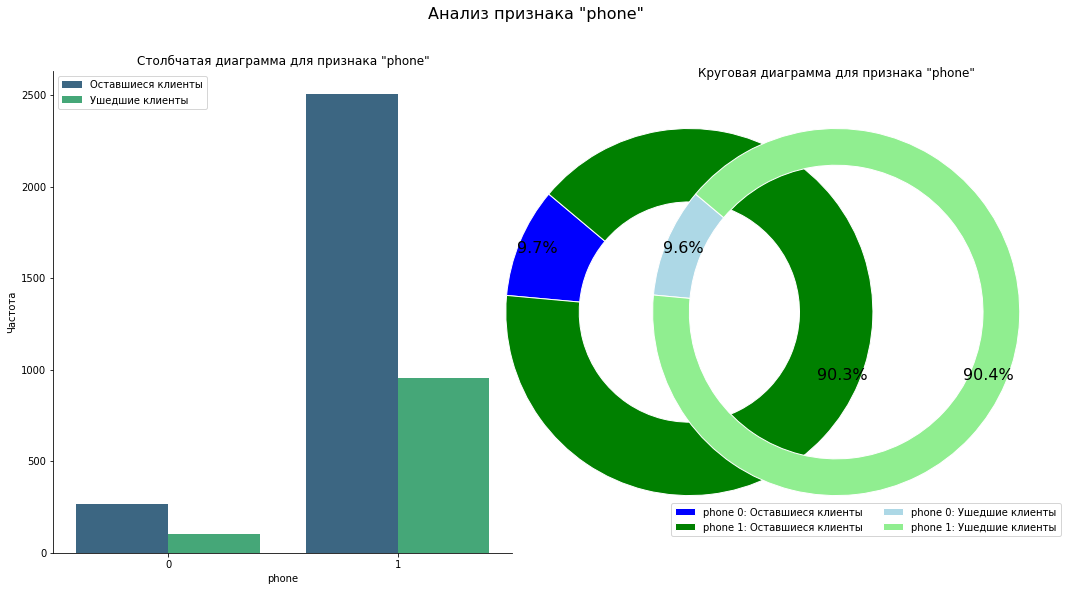

In [74]:
# Построим визуализации для признака "phone" для тех, кто ушел (отток) и тех, кто остался (не попали в отток)
plots_for_binary_data(gym, 'phone', 'churn')

9.7%  оставшихся клиентов не оставили свой номер телефона, 9.6% ушедших клиентов не оставили свой номер телефона. Не вижу явной связи этого признака с оттоком.

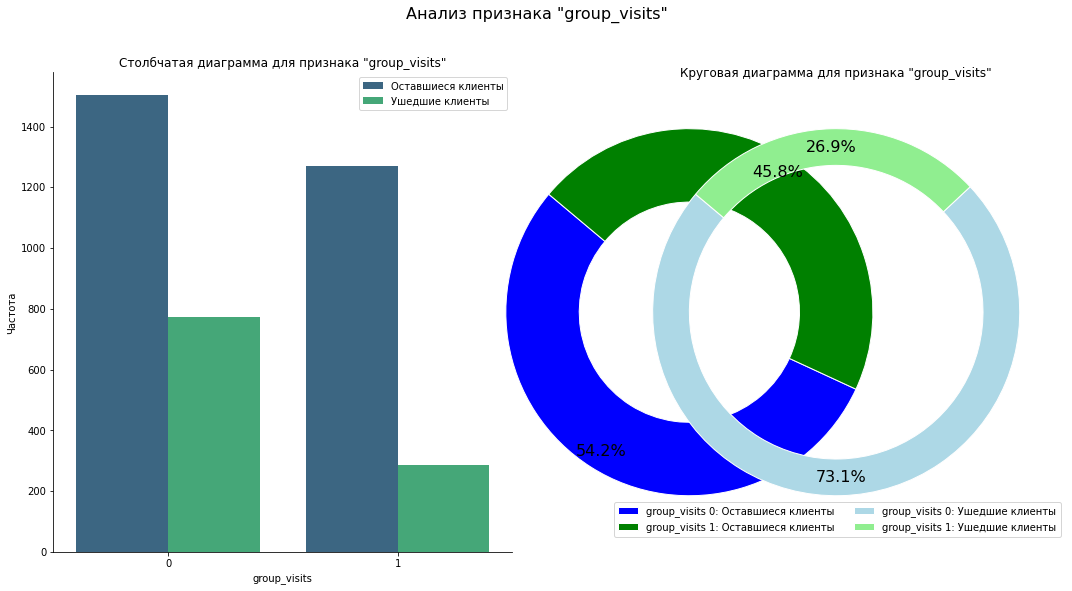

In [75]:
# Построим визуализации для признака "group_visits" для тех, кто ушел (отток) и тех, кто остался (не попали в отток)
plots_for_binary_data(gym, 'group_visits', 'churn')

Люди, посещавшие групповые занятия, уходили реже. Ушли 73.1% тех, кто групповые занятия не посещал, 26.9% ушедших посещади групповые тренировки. Возможно тут дело в компании, так же как и с промо-кодом от друга, если есть с кем разделить хобби, уходить не захочется.

В целом, можно сказать, что:
- на отток совершенно не влияют такие признаки, как пол и наличие контактного номера телефона;
- прослеживается определенная зависимость оттока от следующих признаков: 
  - возраст; 
  - лайфтайм; 
  - близость фитнес-центра к меcту проживания или работы;
  - наличие промо-кода от друга или принадлежность к компаниям-партнерам;
  - посещение групповых занятий;
  - срок  действия контакта.

### Матрица корреляций и heatmap

In [76]:
# Построим матрицу корреляций для датасета gym
gym_corr = gym.corr()

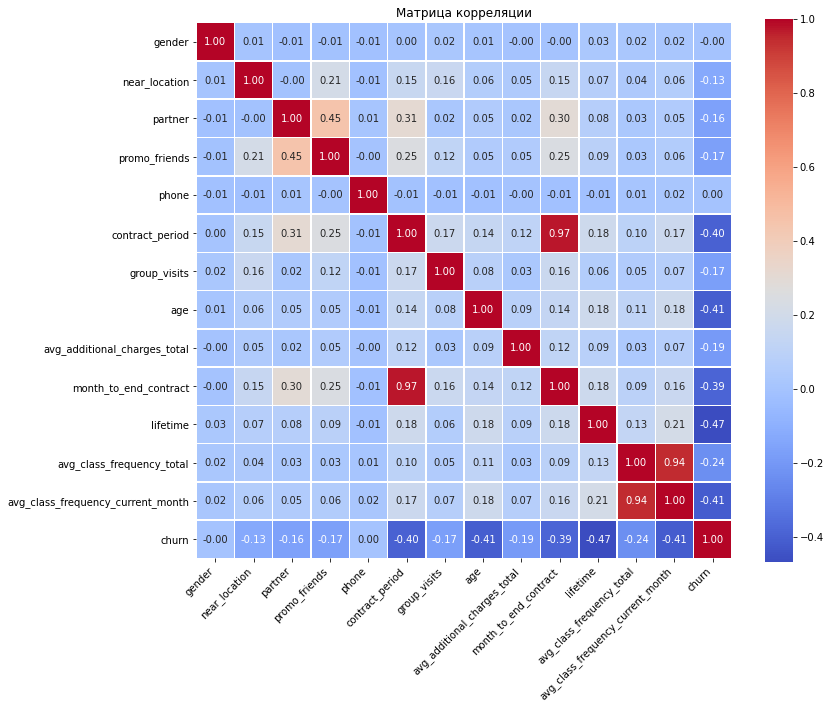

In [77]:
# Отобразим матрицу корреляций с помощью heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(gym_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Матрица корреляции')
plt.xticks(rotation=45, ha='right')
plt.show()

Видим, что у нас возникли сильные взаимные корреляции  выше 0.8, мультиколлиниарные столбцы  month_to_end_contract и contract_period,  а также avg_class_frequency_total и avg_class_frequency_current_month. Также видим взаимные корреляции 0.45 для partner и promo_friends, что логично в принципе.

Судя по матрице, можно выделить такие признаки, влияющие на отток, как:
- лайфтайм;
- количество посещений в неделю за последний месяц;
- возраст;
- длительность действующего контракта;
- количество оставшихся по нему месяцев.



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍






- Мультиколлинеарность выявлена


- Описана  корреляционная связь между признаками и таргетом (но нет тарктовки силы, ниже я приложил шпаргалку, вариант тарктовки силы связи)



- Выбрала приятную палитру


    
    

<div class="alert alert-warning">


Совет: 


- коэффициент Пирсона (который использован) подходит для колличественных и нормально распределенных, для ненормально распределённых используем Спирмена. Если хочешь посмотреть на корреляцию для категориальных то  есть такая библиотека [phik](https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7), ее особенности: работа с разными типами данных, в том числе категориальными, учет нелинейных отношений, плюс отличная интерпретация и визуализация



Вопросики, если хочешь можешь ответить )


- высокая корреляция между признаками называется мультиколлиниарностью.  А в чем проблема мультиколлинеарности (какие 2 типа проблемы вызывает она и для каких моделей)


- можешь вспомнить, только какой тип связи может выявить корреляция Пирсона?


- можно ли утверждать о отсутствии связи при близких к нулю показателях корреляции?


- можно ли утверждать о причинно-следственной связях при высоких значениях корреляции?


- шпаргалка

![avatar](https://www.ok-t.ru/studopediaru/baza17/1942458671852.files/image012.gif)
</div>




</div>



<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Библиотека phik обязательно изучу, спасибо!:)
Отвечаю на вопросы (в меру своего понимания):*
    
 - Мультиколлинеарность возникает, когда есть группа линейно-зависимых признаков — взаимозависимых или очень сильно скоррелированных. Если коэффициент корреляции между двумя признаками слишком большой (часто больше 0.8), с линейной регрессией возникнут проблемы. А именно — нерепрезентативные веса и переобученная под эти признаки модель. Алгоритм не может решить, какой из этих векторов весов лучше. Таких равноправных векторов бывает бесконечное множество. По ним алгоритм не сможет оценить адекватно влияние отдельного признака на целевую переменную. Также проблеме мультиколлинеарности может быть подвержена и логистическая регрессия.
    
 - Тип связи, который может выявить корреляция Пирсона, - это линейная связь. Изменение одной переменной сопровождается постоянным изменением другой переменной.
    
 - Ну тут моя красная ошибка была спойлером!:) Близкий к нулю коэффициент корреляции, такой как корреляция Пирсона, не обязательно означает отсутствие связи между переменными. Он лишь указывает на отсутствие линейной связи. Важно помнить, что между переменными может существовать нелинейная связь, которую корреляция Пирсона может не уловить.
    
 - Я так понимаю, что высокие значения корреляции не обязательно указывают на причинно-следственную связь. Корреляция не позволяет определить, какая переменная вызывает изменения в другой.<i>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Особо и добавить нечего
Разве что по поводу мультиколлинеарности.  Действительно есть риск переобучения у линейных моделей, но с другой стороны в линейных моделях реализована регуляризация, поэтому переобучение из-за мультиколлинеарности не так уж и страшно.  А вот чтобы адекватно оценивать влияние таргета (по коэффициентам линейной или логистической регрессии), ее надо убирать

In [78]:
# Сверяем наши данные по количеству строк по окончанию обработки данных в датасете
a, b = len(temp), len(gym)
print(len(temp), len(gym), round((a - b) / a * 100, 2))

4000 3831 4.23


**Выводы:**

На данном этапе мы:
- преобразовали названия столбцов в нижний регистр;
- преобразовали тип данных в столбце month_to_end_contract в integer;
- проверили данные на пропуски, они не обнаружены;
- проверили данные на явные дубликаты, не обнаружили их;
- изучили уникальные значения в столбцах датасета, явных критичных ошибок нет;
- посмотрели на средние значения  признаков в двух группах: тех, кто ушел (отток) и тех, кто остался:
  - пол, наличие контактного номера не влияеют на отток;
  - близость к работе или месту проживания влияет незначительно (разница примерно в 10%);
  - среди тех, кто работает в компаниях-партнерах, оставшихся больше, чем ушедших примерно на 18%;
  - среди тех, кто пришел по промо-коду от друга осталось больше тех, кто заключил контракт больше, чем на месяц;
  - посетители групповых занятий меньше попали в отток (на 20%);
  - возраст тоже оказывает влияние на отток, в среднем клиенты после 29 лет чаще продолжают посещать фитнес, чем 26ти-летние.
- построили визуализации распределения признаков по вышеуказанным группам:
  - предположение, что на отток совершенно не влияют такие признаки, как пол и наличие контактного номера телефона, подтверждаются;
  - прослеживается определенная зависимость оттока от следующих признаков: возраст, лайфтайм, удаленность фитнес-центра от меcта проживания или работы, наличие промо-кода от друга или принадлежность к компаниям-партнерам, посещение групповых занятий и срок действия контакта.
- построили матрицу корреляций и визуализировали ее:
  - у нас возникли сильные взаимные корреляции выше 0.8 по столбцам month_to_end_contract и contract_period, а также avg_class_frequency_total и avg_class_frequency_current_month. Также видим взаимные корреляции 0.45 для partner и promo_friends, что логично в принципе; 
  - судя по матрице, можно выделить такие признаки, влияющие на отток, как лайфтайм, количество посещений в неделю за последний месяц, возраст, длительность действующего контракта, количество оставшихся по нему месяцев.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Данные изучены. describe(), groupby(), графики распределения признаков с разбивкой по таргету, матрица корреляций - присутствуют. 


И в конце подробный вывод. Отлично. 




<div class="alert alert-warning">

Совет: 

    
    

    
    


- Сейчас это не нужно (пока лучше вручную набивать все эти .info, count_values, .describe, .diplicate...) но в будущем можешь обратить внимание на библиотечки, в которых уже собран необходимый минимум при EDA (и не только минимум), например [ydata_profiling](https://docs.profiling.ydata.ai/4.5/) или [pandas_profiling](https://habr.com/ru/companies/ruvds/articles/451478/) - будет информативно и красиво.



<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Обязательно, спасибо! Информативно и красиво - это я только за!:)<i>
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Я заметил что ты за красоту


<a id="3"></a>

## Построение модели прогнозирования оттока клиентов

In [79]:
'''
# Перед построением модели удалим столбцы gender и phone, которые никак не влияют на отток, а также 
# по одному из взаимно-коррелирующих столбцов, например, month_to_end_contract и avg_class_frequency_total
gym_dropped = gym.drop(['gender', 'phone', 'month_to_end_contract', 'avg_class_frequency_total'], axis=1)

# Посмотрим, как соотносятся классы набора данных
display('Соотношение классов:', gym_dropped['churn'].value_counts())
'''

"\n# Перед построением модели удалим столбцы gender и phone, которые никак не влияют на отток, а также \n# по одному из взаимно-коррелирующих столбцов, например, month_to_end_contract и avg_class_frequency_total\ngym_dropped = gym.drop(['gender', 'phone', 'month_to_end_contract', 'avg_class_frequency_total'], axis=1)\n\n# Посмотрим, как соотносятся классы набора данных\ndisplay('Соотношение классов:', gym_dropped['churn'].value_counts())\n"

In [80]:
# Перед построением модели удалим мультиколлинеарные столбцы, например, month_to_end_contract и 
# avg_class_frequency_total
gym_dropped = gym.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)

# Посмотрим, как соотносятся классы набора данных
display('Соотношение классов:', gym_dropped['churn'].value_counts())

'Соотношение классов:'

0    2772
1    1059
Name: churn, dtype: int64

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:





Вышес я задал вопрос Какие связи улавливают коэффициент Персона.  В том-то и дело, что даже если между признаками и таргетом нулевая корреляция, это не значит что признаки бесполезны, ты Связь может быть более сложный, нелинейной

<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Поняла, вернула gender и phone обратно!:)<i>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍



Всё-таки нулевая корреляция - это недостаточный аргумент.  Тем более это категориальные признаки, для них считать коэффициент Пирсона бесполезно


В отток попала примерно треть клиентов.

In [81]:
# Определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_test, predictions, probabilities, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, predictions)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:


Здорово что используешь самописную функцию. Но лучше её разместить сразу после импортов
    
    
<div class="alert alert-warning">




Совет 🤔:



- Можно кстати добавить расчёт roc_auc, там есть небольшая хитрость...  



<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Добавила roc_auc, в чем хитрость пока не поняла?!:) Вопрос на будущее: а все самописные функции лучше сразу после импортов размещать?<i>
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Хитрость в том что берётся predict_proba, видимо для тебя это нехитро )
    
    
Я бы все функции оставлял под импортами, так легче их контролировать и искать    


In [82]:
# Разделяем данные на признаки (матрица X) и целевую переменную (y)
X = gym_dropped.drop(['churn'], axis=1)
y = gym_dropped['churn']

# Разбиваем  данные на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
'''
# Стандартизируем данные
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)
'''
# Преобразуем Pandas DataFrame в массив NumPy
X_train_array = X_train.values
X_test_array = X_test.values

# Стандартизируем данные
scaler = StandardScaler()
scaler.fit(X_train_array)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train_array)
X_test_st = scaler.transform(X_test_array)





<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>





Совет: 





- обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут




<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>stratify добавила! Пришлось немного переписать код из-за появившейся кучи ошибок и warnings после апгрейда numpy.<i>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍




</div>


### Логистическая регрессия

In [83]:
# Задаем алгоритм логистической регрессии для модели и обучаем ее
logistic_regression = LogisticRegression(random_state=0, solver='liblinear')
logistic_regression.fit(X_train_st, y_train)

# Предсказание на валидационной выборке
predictions_lr = logistic_regression.predict(X_test_st)

# Оценим вероятность принадлежности клиенитов ко второму классу (среди классов "0" и "1", имеем в виду класс "1")
# на валидационной выборке
probabilities_lr = logistic_regression.predict_proba(X_test_st)[:, 1]

### Случайный лес

In [84]:
# Задаем алгоритм случайного леса для модели и обучаем ее 
random_forest = RandomForestClassifier(random_state=0, n_estimators = 100)
random_forest.fit(X_train_st, y_train)

# Предсказаниe на валидационной выборке
predictions_rf = random_forest.predict(X_test_st)

# Оценим вероятность принадлежности клиенитов ко второму классу (среди классов "0" и "1", имеем в виду класс "1")
# на валидационной выборке
probabilities_rf = random_forest.predict_proba(X_test_st)[:, 1]


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:



- Работа выполнена в соответствии с критериями: обучаем на train, оцениваем на валидационной
    
    
- Шкалирование проведено корректно    


<div class="alert alert-warning">


Совет: 


Совет 1.

Тем не менее хочу напомнить о логике использования датасетов когда пробуем несколько моделей и выбираем лучшую:    
    
1. На train мы обучаем
2. По валидации смотрим на результаты обучения (следим чтобы не было переобучения и/или делаем подбор гиперпараметров, если есть подбор гиперпараметров). И выбираем лучшую модель. 
3. Тестовая (out-of_sample) у нас для финальной проверки, когда определена лучшая модель с конкретными гиперпараметрами (или лучшая по дефолтным). 
    
[Вот](https://towardsdatascience.com/why-do-we-need-a-validation-set-in-addition-to-training-and-test-sets-5cf4a65550e0   ) тут можно дополнительно почитать.

    
Так что если все делать правильно, то нужно 3 разных датасета. На валидационном датасете находим  лучшую модель (лучше конечно не по дефолтным значениям, а добавить какой то перебор гиперпараметров в цикле) и только затем, выбрав лучшую модель (с лучшими значениями гиперпараметров) проведем тестирование на датасете о котором наша модель не имеет никакого представления. И если окажется что тестовая метрика наша лучшая на валидации модель не удовлетворяет критериям качества, то мы начнем процесс моделирования с начала (а не будем пробовать другие модели которые были хуже на валидации - по приниципу "а вдруг другая модель подойдет").   



Совет 2.

Как можно улучшить метрику: 


- Для RF можно в цикле поперебирать лучшие гиперпараметр, чтобы улучшить метрику


- Попробовать передать в модель параметр учитывающий дисбланас классов  




</div>


<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Вот по поводу разбивки на три датасета у нас в теории была информация, но в самом тренажере при решении задач мы это не применяли, валидационная выборка стала называться X_test сразу. Нам дали, видимо, сильно упрощенный вариант!:) Обязательно почитаю допольнительно, спасибо!<i>
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:



Действительно это упрощённый вариант, видимо решили DA особо не грузить тонкостями машинного обучения


In [85]:
# Вывод результатов для модели логистической регрессии
print_all_metrics(y_test, predictions_lr, probabilities_lr, title='Метрики для модели логистической регрессии:')
# Вывод результатов для модели случайного леса
print_all_metrics(y_test, predictions_rf, probabilities_rf, title='Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.89
	Precision: 0.79
	Recall: 0.84
	ROC_AUC: 0.96
Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.81
	Recall: 0.77
	ROC_AUC: 0.95


Итак, что показывают выведенные метрики:
- обе модели показывают высокую точность по accuracy, равную 0.89 (примерно 89% всех предсказаний моделей  - правильные), но тут нужно учитывать, баланс классов, у нас он неравномерный (примерно 1/3 ушедших, 2/3 оставшихся). Этот факт может влиять на точность;
- чем выше значение метрики precision, тем меньше ложно-положительных предсказаний. По этой метрике  модели показали результат 0.79 и 0.81;
- модели имеют recall, равный 0.84 и 0.77, соответственно. Это означает, что примерно 84% или 87% клиентов, которые действительно ушли (положительный класс), были правильно выявлены моделями;
- модели имеют ROC_AUC, равный 0.96 и 0.95. Это означает, что модели хорошо различают классы в  бинарной классификации.

В целом, обе модели показывают хорошие результаты, но результаты модели логистической регрессии немного лучше.

Попробуем сбалансировать классы с помощью порогового значения 0.4.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

да, при дисбалансе эта метрика может врать. Аccuracy можно использовать, но держа в голове что нулей 73%, то есть аccuracy нашей модели должна быть выше 0,73, иначе модель не адекватная. Кстати при обучении модель можно учесть дисбаланс 

In [86]:
'''
# Оценим вероятность принадлежности клиенитов ко второму классу (среди классов "0" и "1", имеем в виду класс "1")
# на валидационной выборке

# Для модели логистической регресии
probabilities_lr = logistic_regression.predict_proba(X_test_st)[:, 1]

# Для модели случайного леса

probabilities_rf = random_forest.predict_proba(X_test_st)[:, 1]
'''

'\n# Оценим вероятность принадлежности клиенитов ко второму классу (среди классов "0" и "1", имеем в виду класс "1")\n# на валидационной выборке\n\n# Для модели логистической регресии\nprobabilities_lr = logistic_regression.predict_proba(X_test_st)[:, 1]\n\n# Для модели случайного леса\n\nprobabilities_rf = random_forest.predict_proba(X_test_st)[:, 1]\n'

<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Перенесла этот код выше.<i>
</div>

In [87]:
# Рассчитаем вектор финальных прогнозов с учётом порога, равного 0.4, и сравним с метриками, 
# полученными при автоматическом расчёте классов методом predict()

# Задаем порог
threshold = 0.4

# На основании вероятностей и соотношения классов рассчитаем предтскания для модели линейной регрессии
custom_predictions_lr = [0 if i < threshold else 1 for i in probabilities_lr]

# На основании вероятностей и соотношения классов рассчитаем предтскания для модели случайного леса
custom_predictions_rf = [0 if i < threshold else 1 for i in probabilities_rf]

# Выведем все метрики для прогноза по новому порогу
print('Метрики для прогноза с кастомным порогом:\n')

# Вывод результатов для модели логистической регрессии
print_all_metrics(y_test, custom_predictions_lr, probabilities_lr,
                  title='Метрики для модели логистической регрессии:')
# Вывод результатов для модели случайного леса
print_all_metrics(y_test, custom_predictions_rf, probabilities_rf,
                  title='Метрики для модели случайного леса:')

Метрики для прогноза с кастомным порогом:

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.78
	Recall: 0.88
	ROC_AUC: 0.96
Метрики для модели случайного леса:
	Accuracy: 0.88
	Precision: 0.76
	Recall: 0.83
	ROC_AUC: 0.95


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Действительно можно по манипулировать порогом, в зависимости от того какую метрику нам важнее поднять

In [88]:
# Заново обучим лучшую модель
final_model = LogisticRegression(random_state=0, solver='liblinear')
final_model.fit(X_train_st, y_train)
final_predictions = final_model.predict(X_test_st)

# Cоздадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
feature_importance_data = pd.DataFrame({
    'feature': X.columns,
    'сoefficient': final_model.coef_[0]
})
feature_importance_data['abs_сoefficient'] = feature_importance_data['сoefficient'].abs()
feature_importance_data['log_odds'] = feature_importance_data['abs_сoefficient'].apply(np.exp)
feature_importance_data = feature_importance_data.sort_values(by='abs_сoefficient', ascending=False)

display(feature_importance_data)

,feature,сoefficient,abs_сoefficient,log_odds
9,lifetime,-3.3308,3.3308,27.9603
5,contract_period,-1.3384,1.3384,3.8130
7,age,-1.2167,1.2167,3.3759
10,avg_class_frequency_current_month,-1.1926,1.1926,3.2955
8,avg_additional_charges_total,-0.5140,0.5140,1.6720
6,group_visits,-0.3970,0.3970,1.4874
3,promo_friends,-0.2434,0.2434,1.2756
1,near_location,-0.0937,0.0937,1.0982
4,phone,-0.0630,0.0630,1.0650
2,partner,-0.0549,0.0549,1.0564


Чем больше значение log_odds (логарифма шансов), тем сильнее влияние признака на вероятность 
принадлежности к классу 1.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- Действительно интересно посмотреть как именно признаки влияют на Таргет.  И здорово что смотришь по модулю

    

    
<div class="alert alert-warning">


Совет 🤔:


- Отлично.  Но не забываем что в Логистической регрессия ещё есть логарифм, поэтому если хочешь посмотреть как изменение признака на единицу влияют на вероятность отнесения к классу, то посомтри на экспоненту к коэффициентам логистической регрессии. Можешь погуглить как это можно решить
    
    


<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Погуглила, добавила.<i>
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет:



👍 np.exp



А почему от значение коэффициентов по модулю?


**Выводы:**

На данном этапе мы:
- удалили мультиколлинеарные столбцы month_to_end_contract и avg_class_frequency_total;
- разбили данные на обучающую и валидационную выборки;
- обучили модели на train-выборке дву способами:
  - логистической регрессией;
  - случайным лесом.
- оценили метрики accuracy, precision, recall для обеих моделей на валидационной выборке и сравнили по ним модели;
- сбалансировали классы с помощью порогового значения 0.4, получили изменение значения метрик  по сравнению с автоматическим рассчетом. 

Итак, что показывают выведенные метрики:
- Accuracy: общая точность модели, то есть доля правильных предсказаний. Обе модели показывают довольно высокую точность, равную 0.90 и 0.88 (примерно 90%  и 88% всех предсказаний моделей  - правильные);
- Precision: смотрим, какая доля прогнозов относительно "1" класса верна. То есть смотрим долю правильных положительных ответов только среди целевого класса, чем выше значение метрики, тем меньше ложно-положительных предсказаний. По этой метрике  модель линейной регрессии показала немного лучший результат (0.78), чем модель случайного леса (0.76);
- Recall: смотрим, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели. Модели имеют recall, равный 0.88 и 0.83, соответственно. Это означает, что примерно 88% или 83% клиентов, которые действительно ушли (положительный класс), были правильно выявлены моделями. Метрика recall выросла после балансировки, это хороший показатель.
- ROC_AUC: значения 0.96 и 0.95 указывают на высокую способность моделей разделять положительные и отрицательные классы.

Итак, обе модели показывают хорошие результаты, но результаты модели логистической регрессии лучше.

- выявили важность признаков. Наиболее важные признаки для нашей модели:
  - время с момента первого обращения в фитнес-центр (в месяцах);
  - длительность текущего действующего контракта (в месяцах);
  - средняя частота посещений в неделю за предыдущий месяц;
  - возраст клиента.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



И в конце отличный промежуточный вывод.  Хотя  какая модель лучше - дискуссионный.  Мы всё-таки не знаем  постановку бизнес-задачи

<a id="4"></a>

## Кластеризация клиентов

In [89]:
# Отложим столбец с оттоком
churn_column = gym_dropped['churn']

# Удалим столбец "churn" из датасета gym_dropped
gym_dropped = gym_dropped.drop(['churn'], axis=1)
'''
# Cтандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(gym_dropped)
'''
# Cтандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(gym_dropped.values)

### Матрица расстояний и дендрограмма

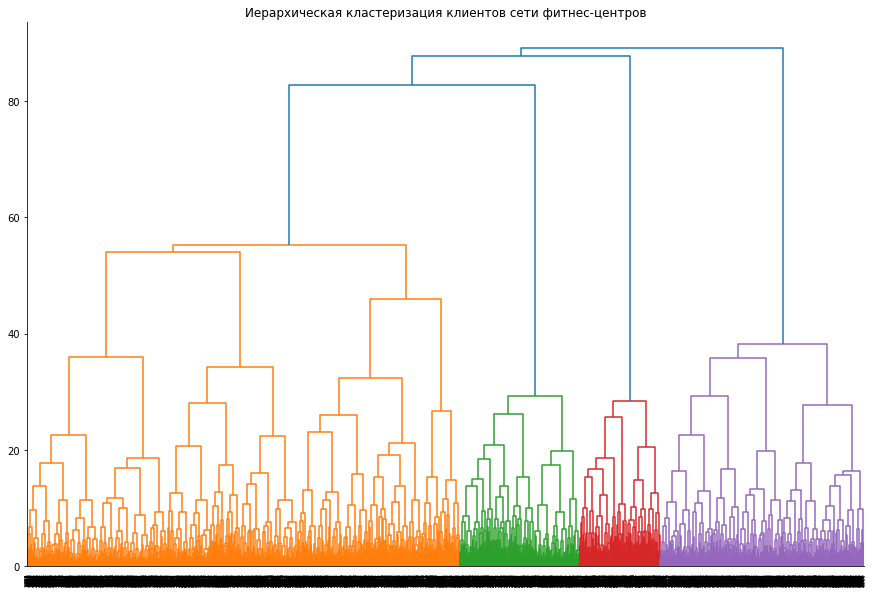

In [90]:
# Построим матрицу расстояний 
linked = linkage(x_sc, method='ward')

# Построим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Иерархическая кластеризация клиентов сети фитнес-центров')
sns.despine()
plt.show() 

На дендрограмме мы видим 4 цвета, оранжевая область получилась больше остальных.

### K-Means

In [91]:
# Задаём алгоритм K_means для модели  с числом кластеров 5
kmeans = KMeans(n_clusters=5, random_state=0)

# Прогнозируем кластеры для наблюдений по датасету gym_dropped_churn
labels = kmeans.fit_predict(x_sc)

### Средние значения признаков по кластерам

In [92]:
# Cохраняем метки кластера в поле нашего датасета gym_dropped_churn
gym_dropped['cluster_kmeans'] = labels

# Возвращаем столбец churn
gym_dropped['churn'] = churn_column

# Выводим статистику по средним значениям наших признаков по кластеру в датасете gym_dropped_churn, с которым 
# продолжим работать
cluster_means = gym_dropped.groupby('cluster_kmeans').mean().T

# Напишем функцию, с помощью которой найдем максимальные значения в каждой строке и выделим ячейки голубым цветом
def value_max(row):
    is_max = row == row.max()
    return ['background-color: lightblue' if cell else '' for cell in is_max] 

# Применение функции к каждой строке
styled_means = cluster_means.style.apply(value_max, axis=1)

display(styled_means)

cluster_kmeans,0,1,2,3,4
gender,0.521073,0.589461,0.498965,0.463259,0.503401
near_location,0.986590,1.000000,0.994824,1.000000,0.000000
partner,0.628352,0.132353,0.934783,0.259851,0.484694
promo_friends,0.000000,0.082108,1.000000,0.115016,0.076531
phone,0.898467,0.897059,0.898551,0.911608,0.911565
contract_period,10.701149,2.066176,7.408903,1.777423,2.894558
group_visits,0.500000,0.531863,0.525880,0.238552,0.215986
age,30.088123,30.537990,29.637681,27.167199,28.617347
avg_additional_charges_total,160.916549,158.978266,152.928307,116.786880,132.973528
lifetime,4.321839,5.053922,4.232919,1.466454,2.877551


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Отличная раскраска
    
    
<div class="alert alert-warning">

Совет:



- Можно было раскрасить всё, выделив ещё и минимальные значения

        
    cluster_features.T.style.background_gradient(cmap='coolwarm', axis=1).set_precision(2)


    

<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Спасибо! Твой код выдал ошибку AttributeError: 'Styler' object has no attribute 'set_precision'. Я пока не поняла, как это пофиксить...<i>
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Наверное это связано с изменением версий библиотеки (возможно когда ты что-то меняла для skimpy)

можно попробовать    
    
    .format(precision=2)

    
Ниже я запустил, всё отработало   

In [101]:
# код ревьюера

# У меня отработало
cluster_means.style.background_gradient(cmap='coolwarm', axis=1).set_precision(2)

cluster_kmeans,0,1,2,3,4
gender,0.52,0.59,0.50,0.46,0.50
near_location,0.99,1.00,0.99,1.00,0.00
partner,0.63,0.13,0.93,0.26,0.48
promo_friends,0.00,0.08,1.00,0.12,0.08
phone,0.90,0.90,0.90,0.91,0.91
contract_period,10.70,2.07,7.41,1.78,2.89
group_visits,0.50,0.53,0.53,0.24,0.22
age,30.09,30.54,29.64,27.17,28.62
avg_additional_charges_total,160.92,158.98,152.93,116.79,132.97
lifetime,4.32,5.05,4.23,1.47,2.88


Проанализировав средние значения признаков по кластерам можно сделать следующие выводы по кластерам:
- gender: в кластере 1 больше единичек (предположительно мужчин), но по остальным кластерам по этому признаку разделение достаточно равномерное;    
- near_location: в кластере 4 клиенты находятся максимально далеко от фитнес-центра, в то время как в кластере 1 и 3 - максимально близко;
- partner: кластер 2 имеет самое высокое значение, что может указывать на то, что в него попали клиенты, пришедщие от компаний-парнеров;
- promo_friends: кластер 2  выделяется  также самым высоким значением, что свидетельствует в пользу успешности данной акции в этом кластере;
- phone: какую-то зависимость сложно найти, но в 3 кластере клиентов, оставивших контактный номер телефона, немного больше, чем в других;
- сontract_period: кластер 0 имеет самый длительный средний срок договора, более 10 месяцев;
- group_visits: кластер 1 имеет наибольшее значение, что указывает на большой интерес к групповым тренировкам, а кластер 4 - наименьшее значение;
- age: кластер 1 имеет самое высокое среднее значение возраста - старше 30 лет, но оно несильно отличается от показателя кластера 0;
- avg_additional_charges_total: кластер 0 выделяется более высокими средними дополнительными расходами;
- lifetime: кластер 0 имеет более высокие значения, чем все остальные кластеры, более 5 месяцев, хуже всего лайфтайм в кластере 3;
- avg_class_frequency_current_month: кластер 1  выделяется более высоким средним значением по еженедельным посещениям в текущем месяце, более 2х раз в неделю;
- churn: отток самый низкий в кластере 0, самый высокий в кластере 3.

В целом, стоит обратить внимание на клакстеры 0, 1 и 2, похоже, что в них попала более постоянная и активная аудитория.

Каков же типичный портрет клиента в этих кластерах? Я бы разбила клиентов на три группы:
- группа 1 - "Сами по себе" (кластер 0 и кластер 1):
  - это люди, которые вместе скорее всего не работают, промо-кодами не пользуются;
  - фитнес-центр расположен к месту их проживания или работы максимально близко;
  - в возрасте старше 30 лет;
  - средний срок контракта от 2 до 10 месяцев;
  - половина из них ничего не имеет против групповых тренировок;
  - пришли в данную сеть бизнес-центров  раньше, чем во всех других кластерах, более 4х месяцев назад;
  - посещают фитнес-центр регулярно, 2 и больше раз в неделю;
  - тратят больше всех денег на дополнительные услуги;
  - уровень оттока самый низкий.
  
Такие люди - сами по себе, больше похоже на то, что спорт и фитнес-центр - это их осознанный выбор, ради поддержания формы и здоровья.

- группа 2 - "Go на тимбилдинг" (кластер 2):
  - это сотрудники компаний-партнеров или люди, не имеющие ничего против промо-кодов от друзей;
  - фитнес-центр расположен к месту их проживания или работы довольно близко;
  - в возрасте 29-30 лет;
  - заключают контракты на длительный срок, в среднем более, чем на полгода;
  - уважают групповые тренировки;
  - пришли в данную сеть бизнес-центров  около 4 месяцев назад;
  - посещают фитнес-центр регулярно, чуть менее 2х раз в неделю;
  - тратят на дополнительные услуги чуть меньше, чем в кластере 0 и 1;
  - невысокий уровень оттока.
  
Складывается впечатление, что для этих людей спорт вместо тимбилдинга, входит в социальный пакет на работе, они все работают вместе или хорошо друг друга знают, держатся вместе, мотивируя друг друга не бросать занятия спортом.

- группа 3 - " А нам все равно" (3ий  и 4ый кластеры):
  - люди в возрасте примерно 27-28 лет;
  - не сотрудники компаний-партнеров и не пользуются промо-кодами;
  - срок контракта короткий - 1-3 месяца, лайфтайм такой же;
  - групповые тренировки не любят;
  - тренировки нерегулярные, хорошо если 1 раз в неделю;
  - на дополнительные услуги тратят меньше всех;
  - фитнес-центр либо максимально близко к дому или работе, либо максимально далеко;
  - самый высокий уровень оттока.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Четко и точно. Можно было даже дать названия кластерам:


"Не с нашего района", "кампанейские", "постоянные".. итп)


Полезно что сравнила кластеры между собой, найдя похожие

<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Спасибо, немного отреагировала с учетом изменений после возврата данных по gender и phone.:)
    Насчет названий еще подумаю!:))<i>
</div>

### Визуализация распределений признаков по кластерам

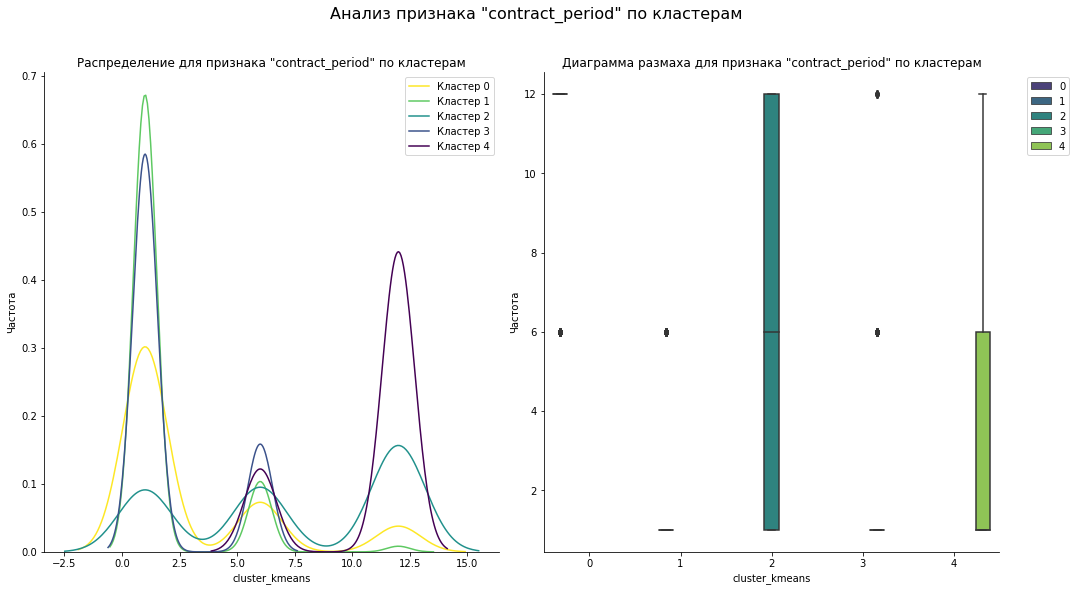

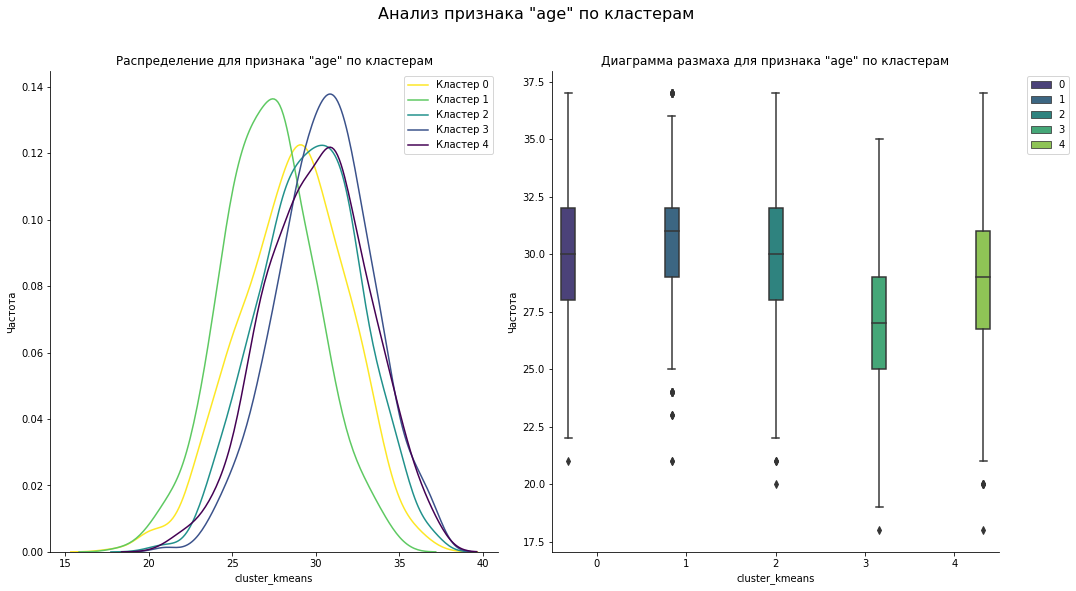

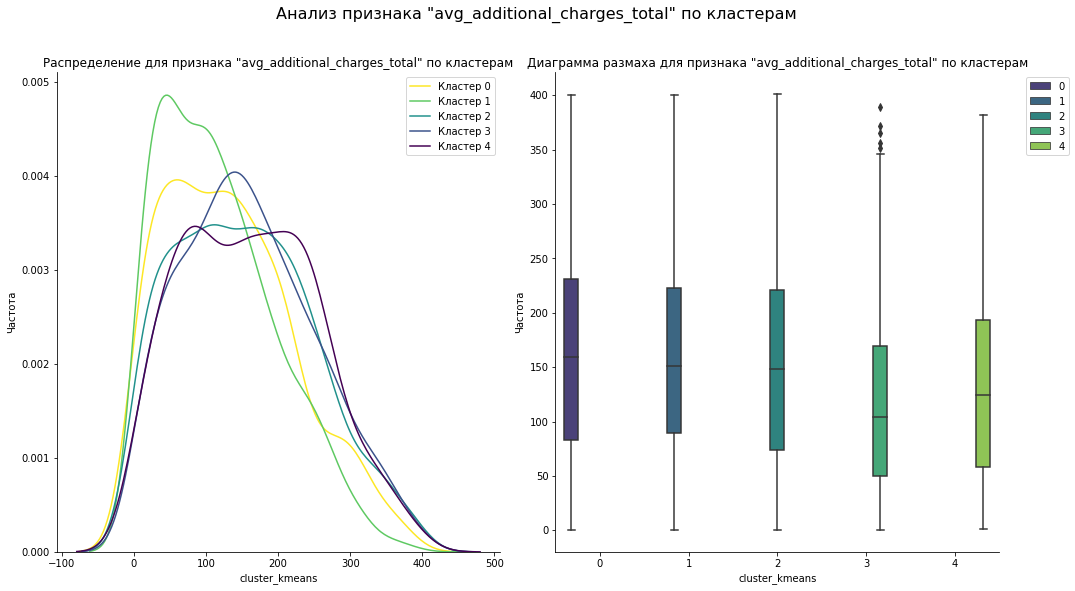

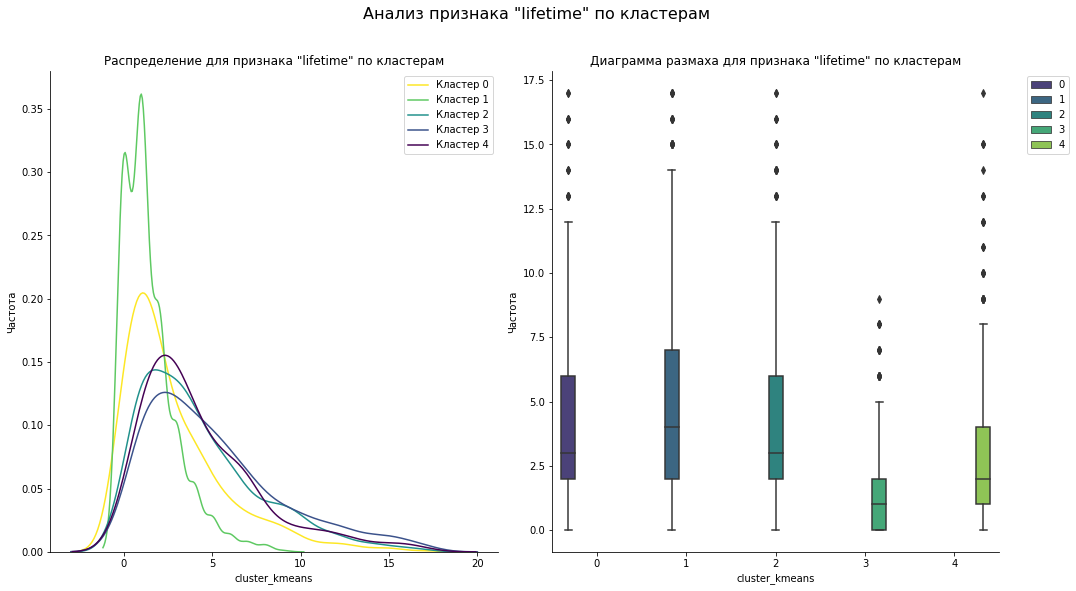

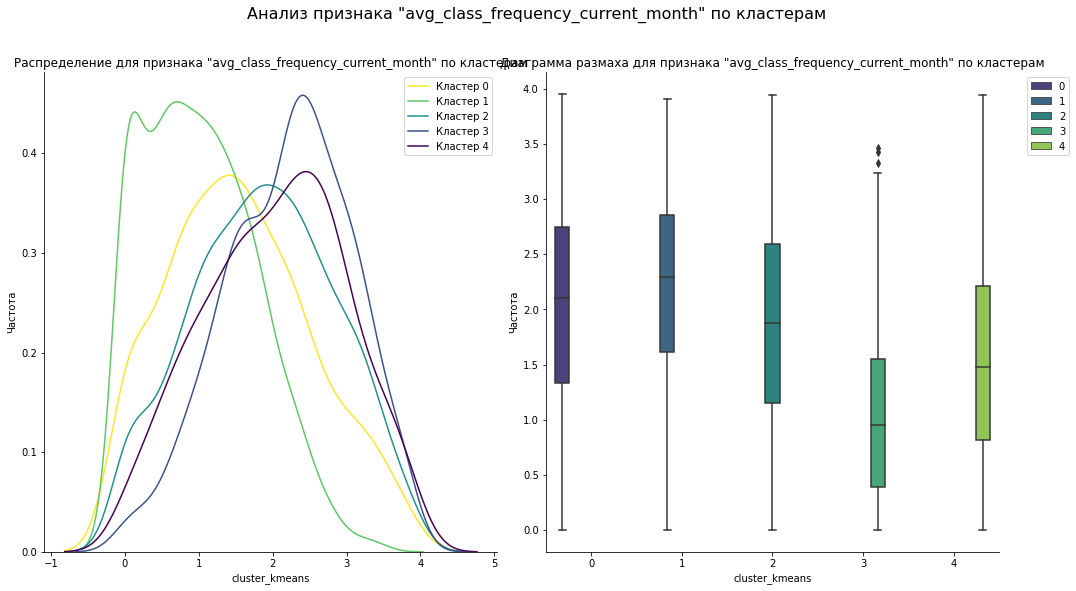

In [93]:
def show_clusters_on_plot_numeric(data, feature, cluster_name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

    # Построение визуализации
    sns.kdeplot(data=data, x=feature, hue=cluster_name, fill=False, common_norm=False, ax=axes[0], 
                palette='viridis')
    axes[0].set_title(f'Распределение для признака "{feature}" по кластерам')
    axes[0].set_xlabel(cluster_name)
    axes[0].set_ylabel('Частота')
    
    # Создаем легенду для первого графика
    legend_labels = [f'Кластер {i}' for i in range(data[cluster_name].nunique())]
    axes[0].legend(legend_labels)


    # Построение диаграммы размаха
    sns.boxplot(data=data, hue=cluster_name, x=cluster_name, y=feature, ax=axes[1], palette='viridis') 
    axes[1].set_title(f'Диаграмма размаха для признака "{feature}" по кластерам')
    axes[1].set_xlabel(cluster_name)
    axes[1].set_ylabel('Частота')   
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.suptitle(f'Анализ признака "{feature}" по кластерам', y=1.02, fontsize=16)
    
    sns.despine()
    plt.tight_layout()    
    plt.show()

# Выбираем столбцы с уникальными значениями более или равно 3, также исключаем столбец "cluster_kmeans"
selected_features = [feature for feature in gym_dropped.columns if feature != 'cluster_kmeans' and 
                     gym_dropped[feature].nunique() >= 3]

# Визуализируем графики для признаков с разметкой по кластерам
feature_charts = list(itertools.combinations(selected_features, 1))
for chart in feature_charts:
    show_clusters_on_plot_numeric(gym_dropped, chart[0], 'cluster_kmeans')

<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Код пришлось немного переписать, все графики после апгрейдов библиотек сломались!:)<i>
</div>

In [94]:
'''
# Определим функцию, отвечающую за визуализацию признаков по кластерам для столбцов с количеством 
#уникальных значений более или равно 3
def show_clusters_on_plot_numeric(data, feature, cluster_name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
    
    # Построение визуализации
    for cluster in range(data[cluster_name].nunique()):
        sns.kdeplot(data[data[cluster_name] == cluster][feature], ax=axes[0], label=f'Кластер {cluster}',
                   palette='viridis')
    axes[0].set_title(f'Распределение для признака "{feature}" по кластерам')
    axes[0].set_xlabel(cluster_name)
    axes[0].set_ylabel('Частота')
    axes[0].legend(bbox_to_anchor=(1, 0.5))
    
    # Построение диаграммы размаха
    sns.boxplot(data=data, hue=cluster_name, x=feature, ax=axes[1], palette='viridis') 
    axes[1].set_title(f'Диаграмма размаха для признака "{feature}" по кластерам')
    axes[1].set_xlabel(cluster_name)
    axes[1].set_ylabel('Частота')    
    
    plt.suptitle(f'Анализ признака "{feature}" по кластерам', y=1.02, fontsize=16)
    
    sns.despine()
    plt.tight_layout()    
    plt.show()   
    
# Выбираем столбцы с уникальными значениями более или равно 3, также исключаем столбец "cluster_kmeans"
selected_features = [feature for feature in gym_dropped.columns if feature != 'cluster_kmeans' and 
                     gym_dropped[feature].nunique() >= 3]

# Визуализируем графики для признаков с разметкой по кластерам
feature_charts = list(itertools.combinations(selected_features, 1))
for chart in feature_charts:
    show_clusters_on_plot_numeric(gym_dropped, chart[0], 'cluster_kmeans') 
'''

'\n# Определим функцию, отвечающую за визуализацию признаков по кластерам для столбцов с количеством \n#уникальных значений более или равно 3\ndef show_clusters_on_plot_numeric(data, feature, cluster_name):\n    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))\n    \n    # Построение визуализации\n    for cluster in range(data[cluster_name].nunique()):\n        sns.kdeplot(data[data[cluster_name] == cluster][feature], ax=axes[0], label=f\'Кластер {cluster}\',\n                   palette=\'viridis\')\n    axes[0].set_title(f\'Распределение для признака "{feature}" по кластерам\')\n    axes[0].set_xlabel(cluster_name)\n    axes[0].set_ylabel(\'Частота\')\n    axes[0].legend(bbox_to_anchor=(1, 0.5))\n    \n    # Построение диаграммы размаха\n    sns.boxplot(data=data, hue=cluster_name, x=feature, ax=axes[1], palette=\'viridis\') \n    axes[1].set_title(f\'Диаграмма размаха для признака "{feature}" по кластерам\')\n    axes[1].set_xlabel(cluster_name)\n    axes[1].set_ylabel(\'Ч

Анализ визуализаций показывает, что:
- contact_period: наибольшие пики значений мы видим для кластера 1 и 3 в интервале от 0 до 2.5 месяцев, в клакстере 0 есть "долгожители" - более 10 месяцев;
- age: старше всего в кластере 1, младше - во 3ем;
- avg_additional_charges_total: меньше всего денег на дополнительные услуги тратят 3й и 4й кластеры, больше всего 0й и 1й;
- lifetime: самый низкий лайфтайм - у 3го и 4го;
- avg_class_frequency_current_month: в кластере 0 и 1 посещаемость в неделю наиболее высокая, в кластере 3 - низкая.

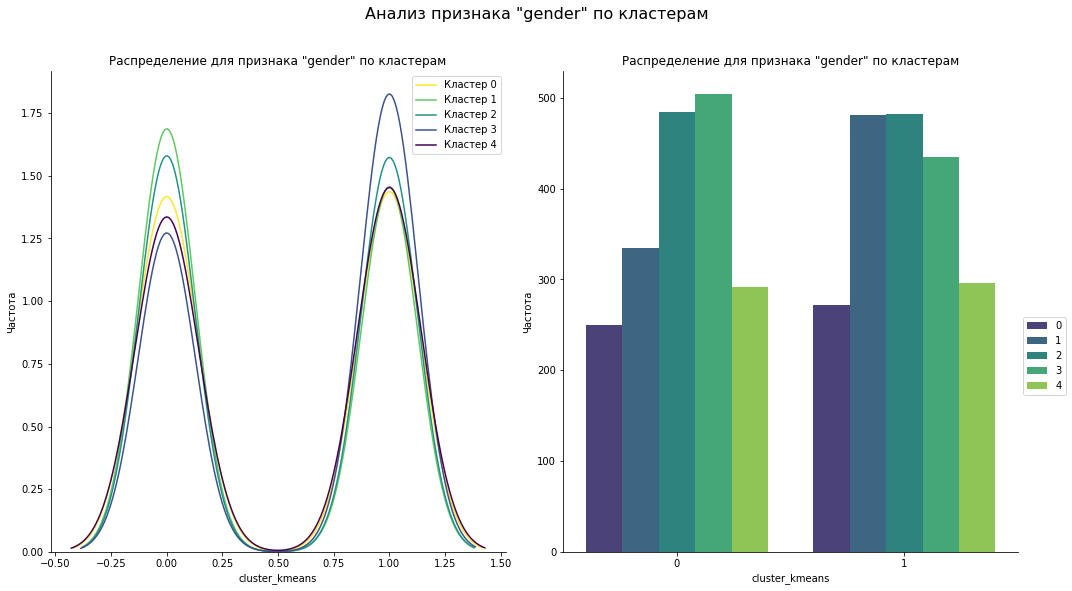

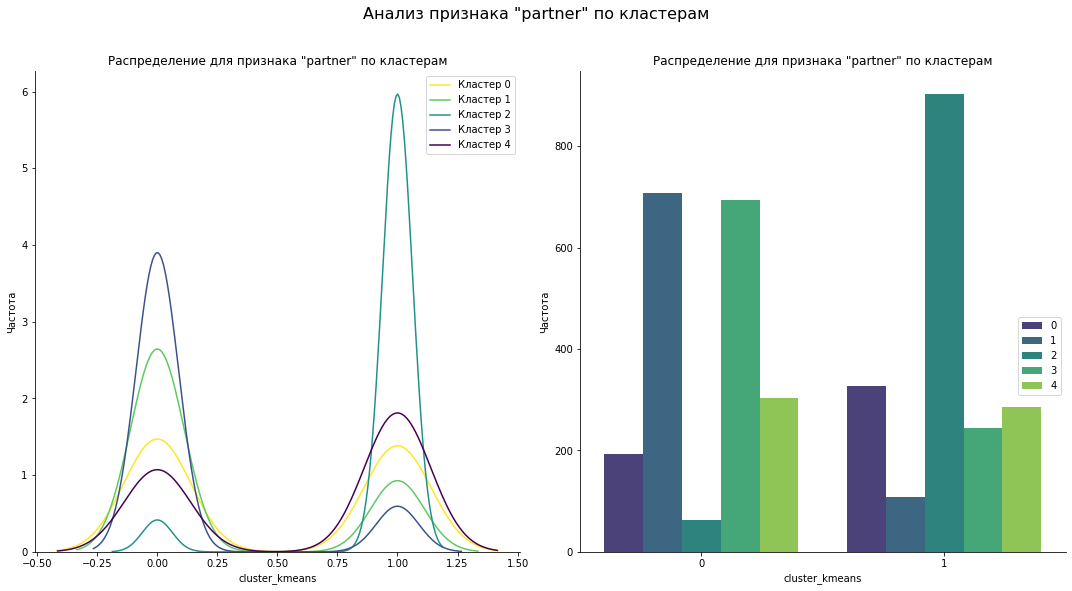

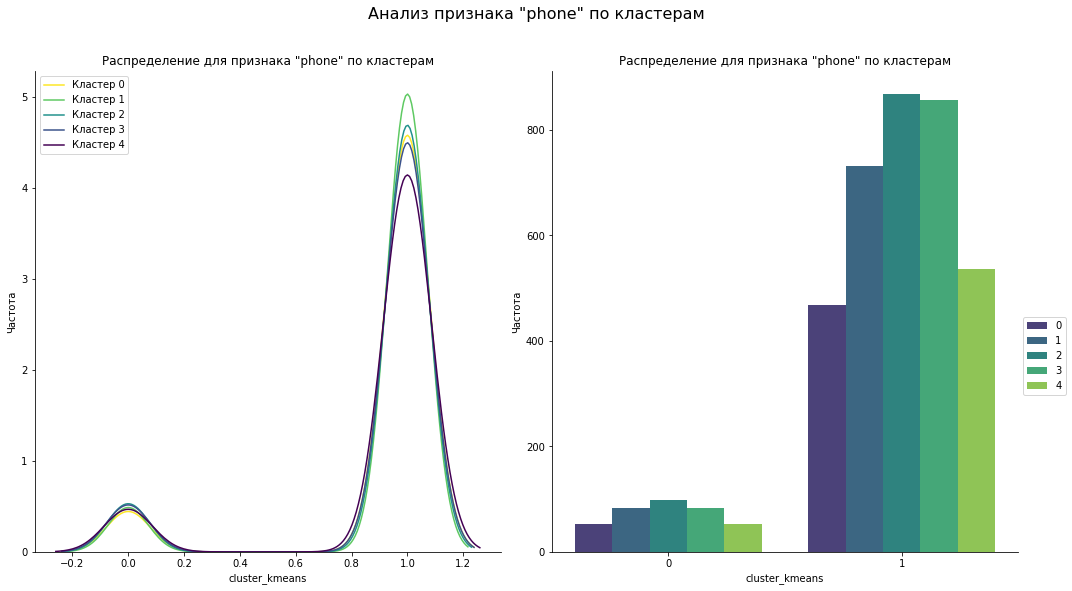

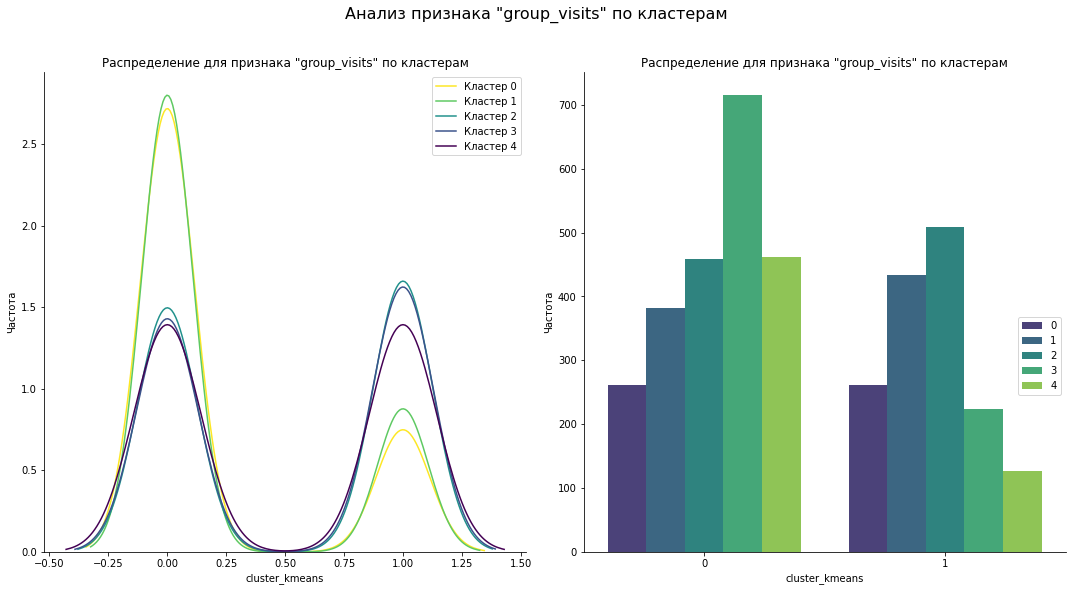

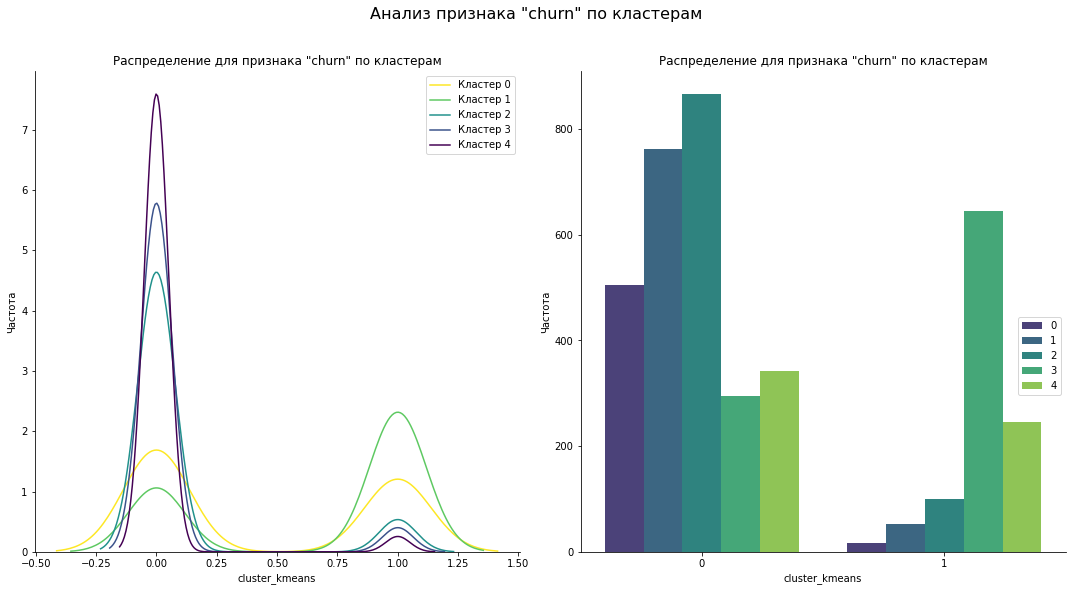

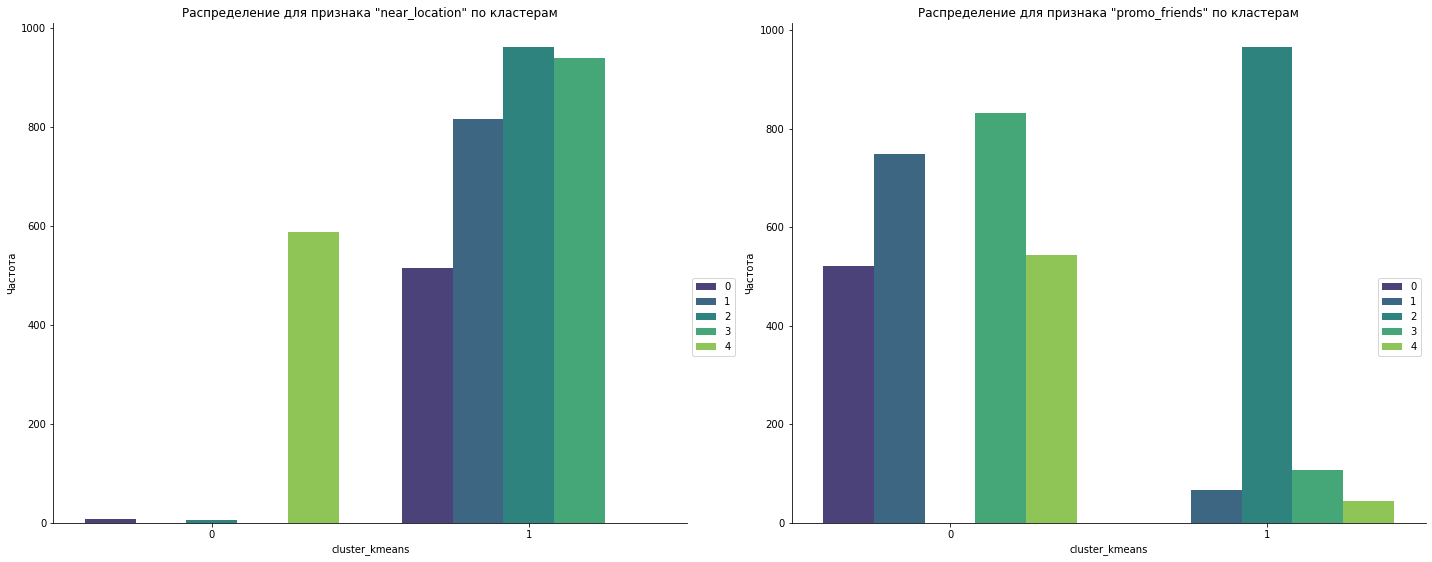

In [95]:
# Определим функцию, отвечающую за визуализацию признаков по кластерам для столбцов с количеством 
#уникальных значений, равным 2
def show_clusters_on_plot_binary(data, feature, cluster_name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
    
    # Построение визуализации
    sns.kdeplot(data=data, x=feature, hue=cluster_name, fill=False, common_norm=False, ax=axes[0], 
               palette='viridis')
    axes[0].set_title(f'Распределение для признака "{feature}" по кластерам')
    axes[0].set_xlabel(cluster_name)
    axes[0].set_ylabel('Частота')
    
    # Создаем легенду для первого графика
    legend_labels = [f'Кластер {i}' for i in range(data[cluster_name].nunique())]
    axes[0].legend(legend_labels)
    
    # Построение столбчатых диаграмм
    sns.countplot(data=data, x=feature, hue=cluster_name, ax=axes[1], palette='viridis')
    axes[1].set_title(f'Распределение для признака "{feature}" по кластерам')
    axes[1].set_xlabel(cluster_name)
    axes[1].set_ylabel('Частота')
    axes[1].legend(bbox_to_anchor=(1, 0.5))
    
    plt.suptitle(f'Анализ признака "{feature}" по кластерам', y=1.02, fontsize=16)
    
    sns.despine()
    plt.tight_layout()    
    plt.show()   

# Выбираем столбцы с уникальными значениями равными 2, кроме near_location, promo_friend, их построим отдельно
selected_features = [feature for feature in gym_dropped.columns if feature != 'near_location' and 
                     feature != 'promo_friends' and gym_dropped[feature].nunique() == 2]

# Визуализируем графики для признаков с разметкой по кластерам
feature_charts = list(itertools.combinations(selected_features, 1))
for chart in feature_charts:
    show_clusters_on_plot_binary(gym_dropped, chart[0], 'cluster_kmeans')  
    
# Построим столбчатые диаграмма для столбцов "near_location", "promo_friends"
plt.figure(figsize=(20, 15))

sns.countplot(data=gym_dropped, x='near_location', hue='cluster_kmeans', palette='viridis', ax=plt.subplot(2,2,1))
plt.title('Распределение для признака "near_location" по кластерам')
plt.xlabel('cluster_kmeans')
plt.ylabel('Частота')
plt.legend(bbox_to_anchor=(1, 0.5))

sns.countplot(data=gym_dropped, x='promo_friends', hue='cluster_kmeans', palette='viridis', ax=plt.subplot(2,2,2))
plt.title('Распределение для признака "promo_friends" по кластерам')
plt.xlabel('cluster_kmeans')
plt.ylabel('Частота')
plt.legend(bbox_to_anchor=(1, 0.5))

sns.despine()
plt.tight_layout()
plt.show()

In [96]:
'''
# Определим функцию, отвечающую за визуализацию признаков по кластерам для столбцов с количеством 
#уникальных значений, равным 2
def show_clusters_on_plot_binary(data, feature, cluster_name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

    # Построение визуализации
    for cluster in range(data[cluster_name].nunique()):
        cluster_data = data[data[cluster_name] == cluster]
        if cluster_data[feature].nunique() > 1:  # Проверка на ненулевую дисперсию
            sns.kdeplot(cluster_data[feature], ax=axes[0], label=f'Кластер {cluster}', palette='viridis')
    axes[0].set_title(f'Распределение для признака "{feature}" по кластерам')
    axes[0].set_xlabel(cluster_name)
    axes[0].set_ylabel('Частота')
    axes[0].legend(bbox_to_anchor=(1, 0.5))
    
    # Построение столбчатых диаграмм
    sns.barplot(data=data, x=feature, y=cluster_name, hue=cluster_name, ax=axes[1], palette='viridis')
    axes[1].set_title(f'Распределение для признака "{feature}" по кластерам')
    axes[1].set_xlabel(cluster_name)
    axes[1].set_ylabel('Частота')
    axes[1].legend(bbox_to_anchor=(1, 0.5))
      
    plt.suptitle(f'Анализ признака "{feature}" по кластерам', y=1.02, fontsize=16)
    
    sns.despine()
    plt.tight_layout()    
    plt.show()   
    
# Выбораем столбцы с уникальными значениями равными 2
selected_features = [feature for feature in gym_dropped.columns if gym_dropped[feature].nunique() == 2]

# Визуализируем графики для признаков с разметкой по кластерам

feature_charts = list(itertools.combinations(selected_features, 1))
for chart in feature_charts:
    show_clusters_on_plot_binary(gym_dropped, chart[0], 'cluster_kmeans')
'''

'\n# Определим функцию, отвечающую за визуализацию признаков по кластерам для столбцов с количеством \n#уникальных значений, равным 2\ndef show_clusters_on_plot_binary(data, feature, cluster_name):\n    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))\n\n    # Построение визуализации\n    for cluster in range(data[cluster_name].nunique()):\n        cluster_data = data[data[cluster_name] == cluster]\n        if cluster_data[feature].nunique() > 1:  # Проверка на ненулевую дисперсию\n            sns.kdeplot(cluster_data[feature], ax=axes[0], label=f\'Кластер {cluster}\', palette=\'viridis\')\n    axes[0].set_title(f\'Распределение для признака "{feature}" по кластерам\')\n    axes[0].set_xlabel(cluster_name)\n    axes[0].set_ylabel(\'Частота\')\n    axes[0].legend(bbox_to_anchor=(1, 0.5))\n    \n    # Построение столбчатых диаграмм\n    sns.barplot(data=data, x=feature, y=cluster_name, hue=cluster_name, ax=axes[1], palette=\'viridis\')\n    axes[1].set_title(f\'Распределение д

<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Вот тут тоже из-за какого-то неведомого мне несоответствия библиотек возник глюк, когда kde строится только на 5 столбцов из 7, я перестроила графики, как смогла, может ты сможешь подсказать, почему так?<i>
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Когда возникает несоответствие библиотек, начина.тся танцы c бубнами.  У меня твой код отрабюотал нормально запустилось. А ещё строить kdeplot  для категориальных признаков не совсем типично


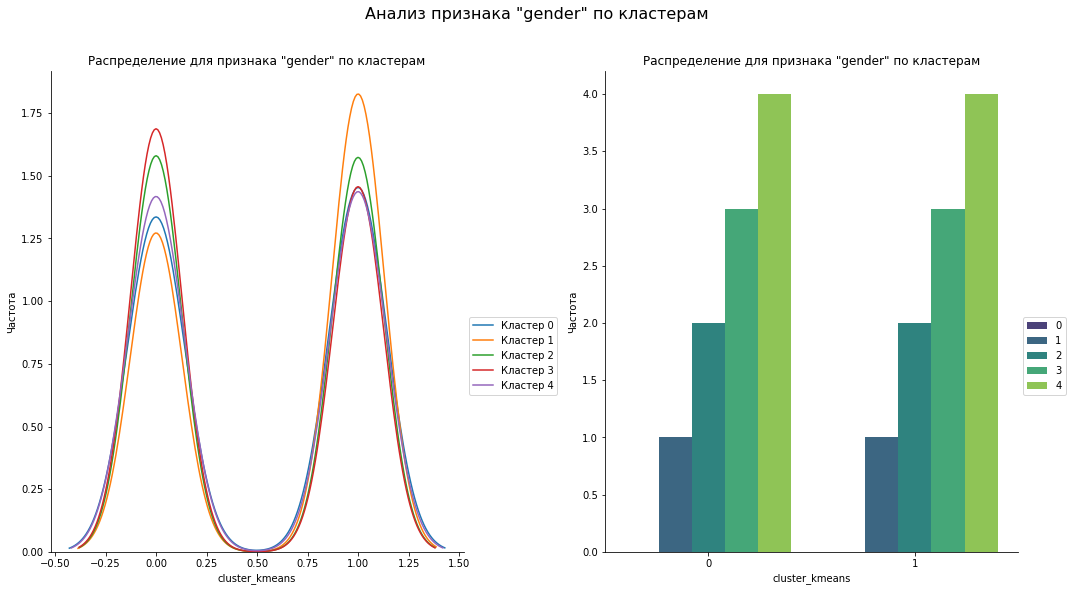

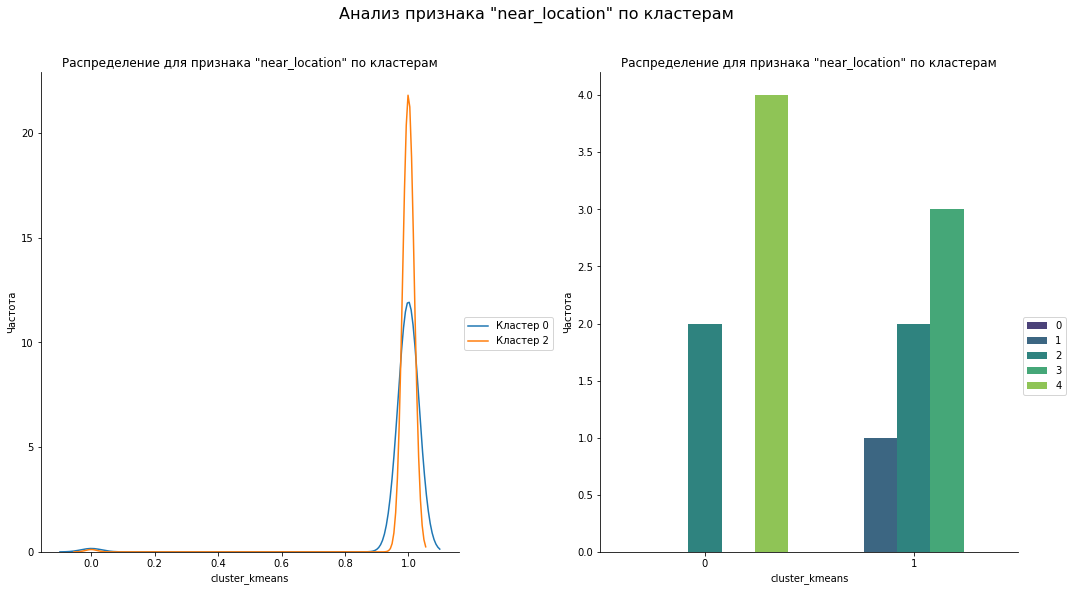

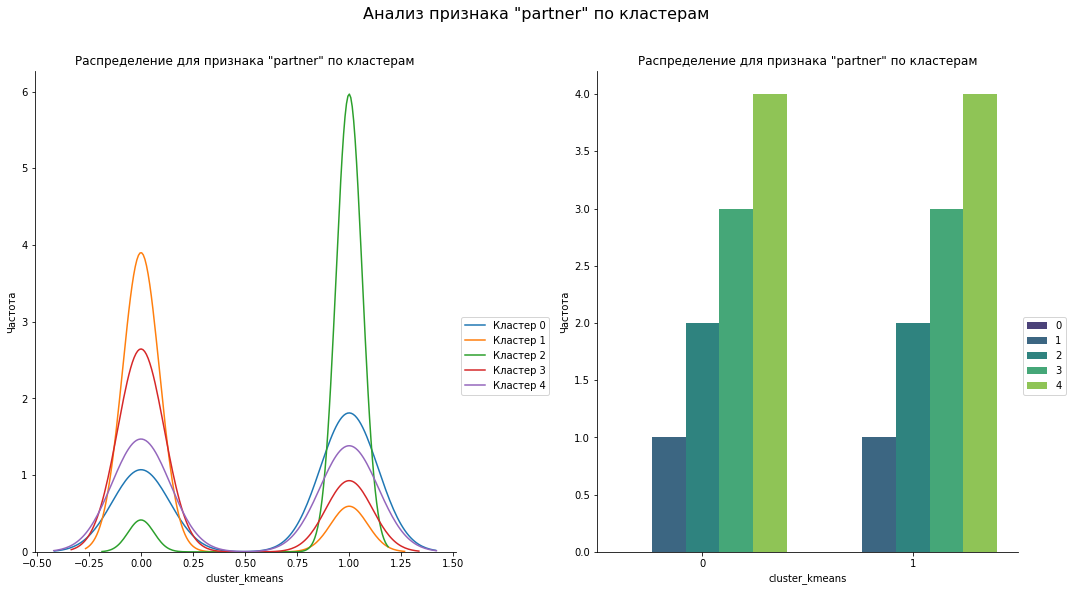

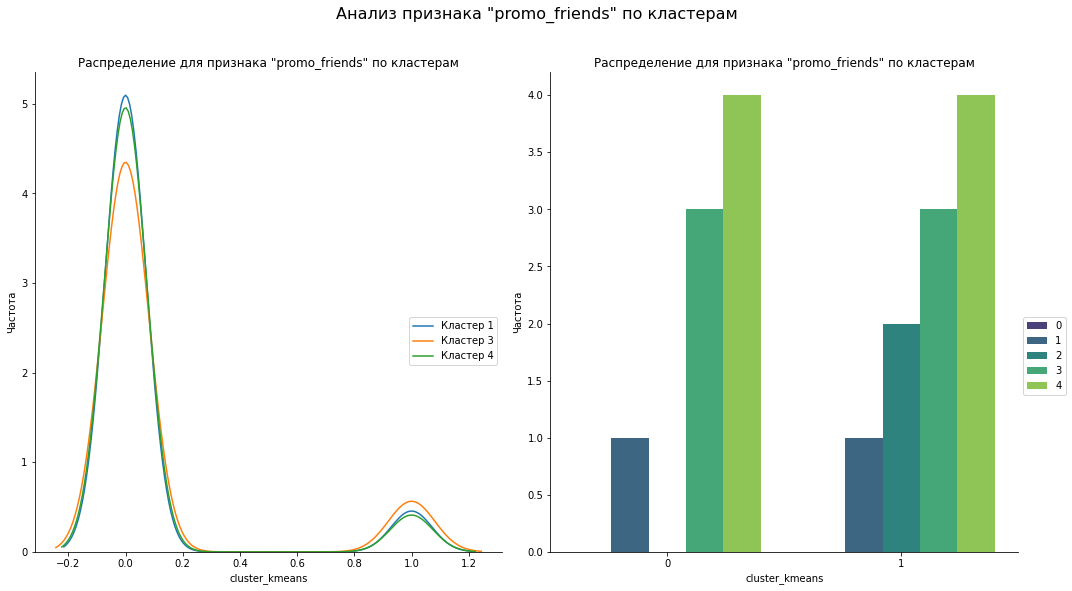

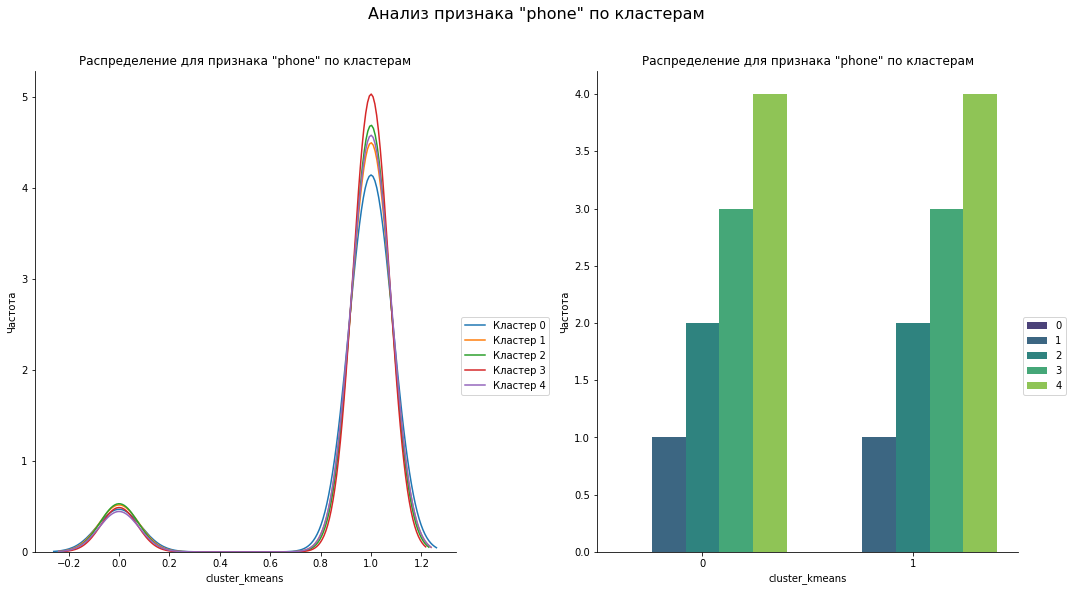

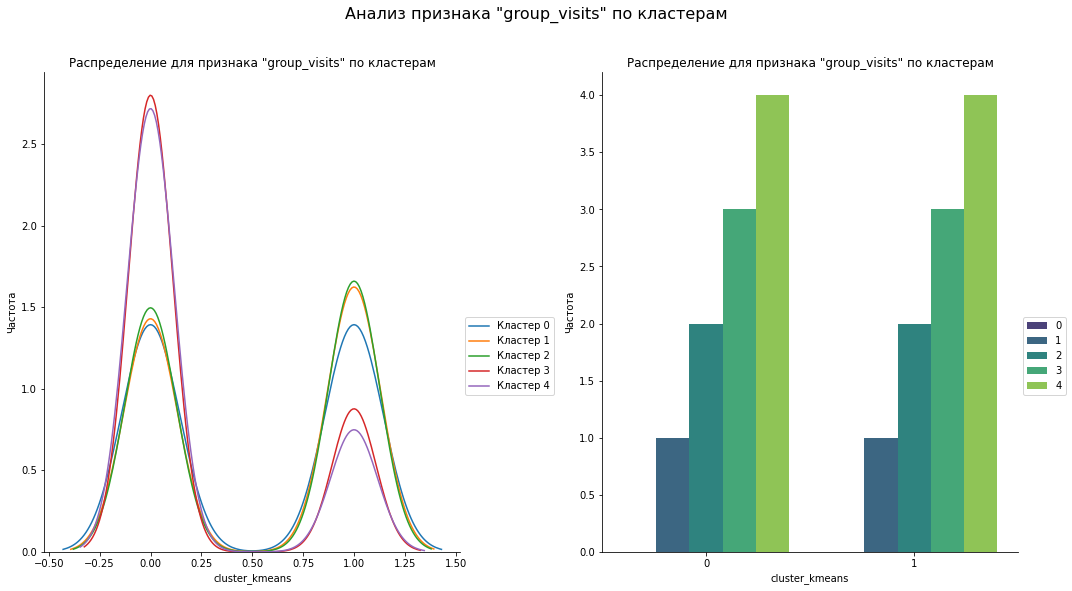

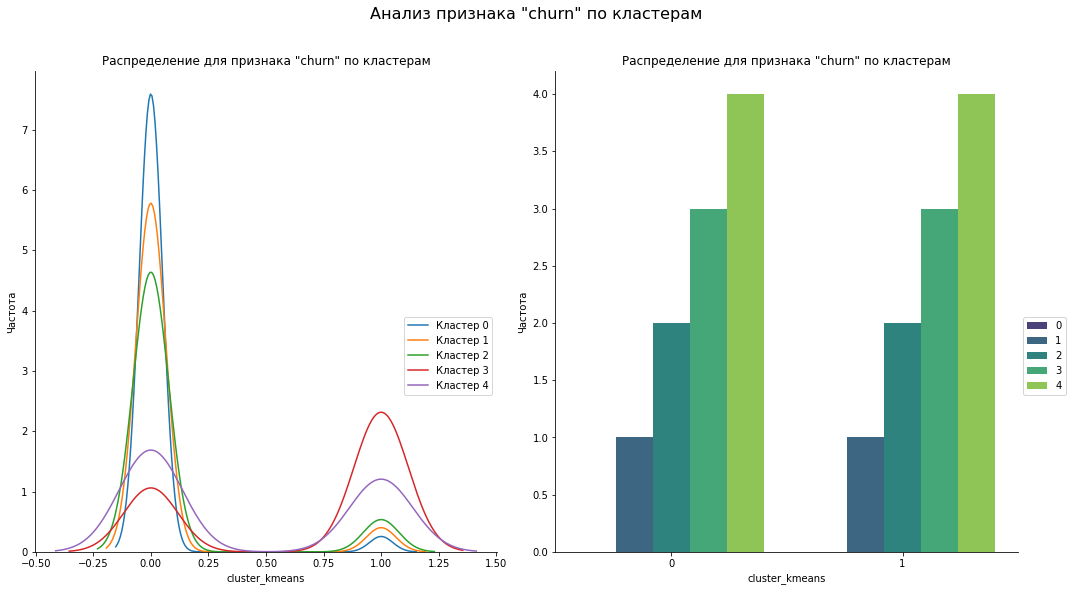

In [102]:
# код ревьюера

# Определим функцию, отвечающую за визуализацию признаков по кластерам для столбцов с количеством 
#уникальных значений, равным 2
def show_clusters_on_plot_binary(data, feature, cluster_name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

    # Построение визуализации
    for cluster in range(data[cluster_name].nunique()):
        cluster_data = data[data[cluster_name] == cluster]
        if cluster_data[feature].nunique() > 1:  # Проверка на ненулевую дисперсию
            sns.kdeplot(cluster_data[feature], ax=axes[0], label=f'Кластер {cluster}', palette='viridis')
    axes[0].set_title(f'Распределение для признака "{feature}" по кластерам')
    axes[0].set_xlabel(cluster_name)
    axes[0].set_ylabel('Частота')
    axes[0].legend(bbox_to_anchor=(1, 0.5))
    
    # Построение столбчатых диаграмм
    sns.barplot(data=data, x=feature, y=cluster_name, hue=cluster_name, ax=axes[1], palette='viridis')
    axes[1].set_title(f'Распределение для признака "{feature}" по кластерам')
    axes[1].set_xlabel(cluster_name)
    axes[1].set_ylabel('Частота')
    axes[1].legend(bbox_to_anchor=(1, 0.5))
      
    plt.suptitle(f'Анализ признака "{feature}" по кластерам', y=1.02, fontsize=16)
    
    sns.despine()
    plt.tight_layout()    
    plt.show()   
    
# Выбораем столбцы с уникальными значениями равными 2
selected_features = [feature for feature in gym_dropped.columns if gym_dropped[feature].nunique() == 2]

# Визуализируем графики для признаков с разметкой по кластерам

feature_charts = list(itertools.combinations(selected_features, 1))
for chart in feature_charts:
    show_clusters_on_plot_binary(gym_dropped, chart[0], 'cluster_kmeans')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍




</div>


Анализ визуализаций показывает, что:
- gender: распределение более менее равномерное, кластер 1 немного перевешивает в сторону 1;
- near_location: клиенты кластеров 0 и 2 живут или работают максимально близко к фитнес-клубу;
- partner: в кластере 2 клиенты, пришедшие от компаний-партнеров;
- promo_friends: в кластере 1, 3, 4 собрались противники промо-кодов;
- phone: юольше всего клиентов из кластеров 3 оставили контактный номер телефона, но в целом, распределение почти равномерно по кластерам как среди ластвивших контакты, так среди не оставивших;
- group_visits: любители групповых тренировок собрались в кластере 2, не любители -во 3м и 4ом;
- churn: отток выше всего в 3ем и 4ом кластерах, ниже всего в 0.

In [97]:
# Посчитаем метрику силуэта для нашей кластеризации
print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)))

Silhouette_score: 0.12


Кластеризация тем лучше, чем сильнее отличаются внутрикластерные и межкластерные расстояния.
Метрика силуэта показывает, насколько объект своего кластера похож на свой кластер больше, чем на чужой. Чем ближе к 1, тем качественнее кластеризация. 

В нашем случае значение метрики силуэта невысокое, возможно, следовало придерживаться показателя дендрограммы при разбиении данных на кластеры.

### Доля оттока для каждого кластера

In [98]:
# Выведем размеры кластеров
print('Размеры кластеров:')
display(gym_dropped.cluster_kmeans.value_counts())

# Посчитаем долю оттока для каждого кластера 
churn_by_cluster = gym_dropped.groupby('cluster_kmeans')['churn'].mean().reset_index()
print('Доля оттока для каждого кластера:')
display(churn_by_cluster["churn"]*100)

Размеры кластеров:


2    966
3    939
1    816
4    588
0    522
Name: cluster_kmeans, dtype: int64

Доля оттока для каждого кластера:


0    3.2567
1    6.4951
2   10.3520
3   68.5836
4   41.6667
Name: churn, dtype: float64



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Хорошо что обратил внимание на размер кластеров, если в кластере мало экземпляров вряд ли будет ананлиз по нему назвать основательным




</div>



Итак, самая низкая доля оттока в кластере 0, самая высокая во 3ем и 4ом. 1й и 2й кластеры показывают определенную стабильность и надежность.

Можно сделать вывод, что на отток больше всего влияют следующие показатели:
- короткий лайфтайм;
- небольшая длительность текущего абонемента;
- возраст до 27 лет;
- низкая посещаемость за последний месяц.

**Выводы:**

На данном этапе мы:
- отложили столбец "churn";
- стандартизировали данные;
- построили матрицу расстрояний и дендрограмму, которая показала разбиение на 3 кластера;
- обучили модель кластеризации на основании алгоритма K-means. В рамках задачи по проекту приняли число кластеров за 5;
- вывели статистику по средним значениям признаков по кластерам:
  - gender: в кластере 1 больше единичек (предположительно мужчин), но по остальным кластерам по этому признаку разделение достаточно равномерное;    
  - near_location: в кластере 4 клиенты находятся максимально далеко от фитнес-центра, в то время как в кластере 1 и 3 - максимально близко;
  - partner: кластер 2 имеет самое высокое значение, что может указывать на то, что в него попали клиенты, пришедщие от компаний-парнеров;
  - promo_friends: кластер 2  выделяется  также самым высоким значением, что свидетельствует в пользу успешности данной акции в этом кластере;
  - phone: какую-то зависимость сложно найти, но в 3 кластере клиентов, оставивших контактный номер телефона, немного больше, чем в других;
  - сontract_period: кластер 0 имеет самый длительный средний срок договора, более 10 месяцев;
  - group_visits: кластер 1 имеет наибольшее значение, что указывает на большой интерес к групповым тренировкам, а кластер 4 - наименьшее значение;
  - age: кластер 1 имеет самое высокое среднее значение возраста - старше 30 лет, но оно несильно отличается от показателя кластера 0;
  - avg_additional_charges_total: кластер 0 выделяется более высокими средними дополнительными расходами;
  - lifetime: кластер 0 имеет более высокие значения, чем все остальные кластеры, более 5 месяцев, хуже всего лайфтайм в кластере 3;
  - avg_class_frequency_current_month: кластер 1  выделяется более высоким средним значением по еженедельным посещениям в текущем месяце, более 2х раз в неделю;
  - churn: отток самый низкий в кластере 0, самый высокий в кластере 3.
- разбили клиентов на 3 группы и сформировали типичный портрет для каждой группы:
  - группа 1 - "Сами по себе" (кластер 0 и кластер 1):
    - это люди, которые вместе скорее всего не работают, промо-кодами не пользуются;
    - фитнес-центр расположен к месту их проживания или работы максимально близко;
    - в возрасте старше 30 лет;
    - средний срок контракта от 2 до 10 месяцев;
    - половина из них ничего не имеет против групповых тренировок;
    - пришли в данную сеть бизнес-центров  раньше, чем во всех других кластерах, более 4х месяцев назад;
    - посещают фитнес-центр регулярно, 2 и больше раз в неделю;
    - тратят больше всех денег на дополнительные услуги;
    - уровень оттока самый низкий.
  
    Такие люди - сами по себе, больше похоже на то, что спорт и фитнес-центр - это их осознанный выбор, ради поддержания формы и здоровья.

  - группа 2 - "Go на тимбилдинг" (кластер 2):
    - это сотрудники компаний-партнеров или люди, не имеющие ничего против промо-кодов от друзей;
    - фитнес-центр расположен к месту их проживания или работы довольно близко;
    - в возрасте 29-30 лет;
    - заключают контракты на длительный срок, в среднем более, чем на полгода;
    - уважают групповые тренировки;
    - пришли в данную сеть бизнес-центров  около 4 месяцев назад;
    - посещают фитнес-центр регулярно, чуть менее 2х раз в неделю;
    - тратят на дополнительные услуги чуть меньше, чем в кластере 0 и 1;
    - невысокий уровень оттока.
    
    Складывается впечатление, что для этих людей спорт вместо тимбилдинга, входит в социальный пакет на работе, они все работают вместе или хорошо друг друга знают, держатся вместе, мотивируя друг друга не бросать занятия спортом.

  - группа 3 - " А нам все равно" (3ий  и 4ый кластеры):
    - люди в возрасте примерно 27-28 лет;
    - не сотрудники компаний-партнеров и не пользуются промо-кодами;
    - срок контракта короткий - 1-3 месяца, лайфтайм такой же;
    - групповые тренировки не любят;
    - тренировки нерегулярные, хорошо если 1 раз в неделю;
    - на дополнительные услуги тратят меньше всех;
    - фитнес-центр либо максимально близко к дому или работе, либо максимально далеко;
    - самый высокий уровень оттока.
   
- визуализировали распределения признаков по кластерам:
  - contact_period: наибольшие пики значений мы видим для кластера 1 и 3 в интервале от 0 до 2.5 месяцев, в клакстере 0 есть "долгожители" - более 10 месяцев;
  - age: старше всего в кластере 1, младше - во 3ем;
  - avg_additional_charges_total: меньше всего денег на дополнительные услуги тратят 3й и 4й кластеры, больше всего 0й и 1й;
  - lifetime: самый низкий лайфтайм - у 3го и 4го;
  - avg_class_frequency_current_month: в кластере 0 и 1 посещаемость в неделю наиболее высокая, в кластере 3 - низкая;
  - gender: распределение более менее равномерное, кластер 1 немного перевешивает в сторону 1;
  - near_location: клиенты кластеров 0 и 2 живут или работают максимально близко к фитнес-клубу;
  - partner: в кластере 2 клиенты, пришедшие от компаний-партнеров;
  - promo_friends: в кластере 1, 3, 4 собрались противники промо-кодов;
  - phone: юольше всего клиентов из кластеров 3 оставили контактный номер телефона, но в целом, распределение почти равномерно по кластерам как среди ластвивших контакты, так среди не оставивших;
  - group_visits: любители групповых тренировок собрались в кластере 2, не любители -во 3м и 4ом;
  - churn: отток выше всего в 3ем и 4ом кластерах, ниже всего в 0.
- рассчитатали метрику силуэта для нашей кластеризации: в нашем случае значение метрики силуэта невысокое (0.12), возможно, следовало придерживаться показателя дендрограммы при разбиении данных на кластеры;
- рассчитали долю оттока для каждого кластера:
  - самая низкая доля оттока в кластере 0, самая высокая во 3м и 4ом. 1й и 2й кластеры показывают определенную стабильность и надежность;
  - можно сделать вывод, что на отток больше всего влияют следующие показатели:
    - короткий лайфтайм;
    - небольшая длительность текущего абонемента;
    - возраст до 27 лет;
    - низкая посещаемость за последний месяц.

<a id="5"></a>

# Общий вывод

Мы проанализировали клиентские анкеты сети фитнес-центров с целью разработки план действий по удержанию клиентов.

***Исследование состояло из следующих этапов:***

- ***Загрузка и базовый анализ данных:***
  - Прочитали файлы с данными;
  - Вывели и изучили общую информацию о них.

  
- ***Предобработка и исследовательский анализ данных:***
  - преобразовали названия столбцов в нижний регистр;
  - преобразовали тип данных в столбце month_to_end_contract в integer;
  - проверили данные на пропуски, они не обнаружены;
  - проверили данные на явные дубликаты, не обнаружили их;
  - изучили уникальные значения в столбцах датасета, явных критичных ошибок нет;
  - посмотрели на средние значения  признаков в двух группах: тех, кто ушел (отток) и тех, кто остался:
    - пол, наличие контактного номера не влияеют на отток;
    - близость к работе или месту проживания влияет незначительно (разница примерно в 10%);
    - среди тех, кто работает в компаниях-партнерах, оставшихся больше, чем ушедших примерно на 18%;
    - среди тех, кто пришел по промо-коду от друга осталось больше тех, кто заключил контракт больше, чем на месяц;
    - посетители групповых занятий меньше попали в отток (на 20%);
    - возраст тоже оказывает влияние на отток, в среднем клиенты после 29 лет чаще продолжают посещать фитнес, чем 26ти-летние.
  - построили визуализации распределения признаков по вышеуказанным группам:
    - предположение, что на отток совершенно не влияют такие признаки, как пол и наличие контактного номера телефона, подтверждаются;
    - прослеживается определенная зависимость оттока от следующих признаков: возраст, лайфтайм, удаленность фитнес-центра от меcта проживания или работы, наличие промо-кода от друга или принадлежность к компаниям-партнерам, посещение групповых занятий и срок действия контакта.
  - построили матрицу корреляций и визуализировали ее:
    - у нас возникли сильные взаимные корреляции выше 0.8 по столбцам month_to_end_contract и contract_period, а также avg_class_frequency_total и avg_class_frequency_current_month; 
    - судя по матрице, можно выделить такие признаки, влияющие на отток, как лайфтайм, количество посещений в неделю за последний месяц, возраст, длительность действующего контракта, количество оставшихся по нему месяцев.

- ***Построение модели прогнозирования оттока клиентов:***
  - удалили мультиколлинеарные столбцы, например, month_to_end_contract и avg_class_frequency_total;;
  - разбили данные на обучающую и валидационную выборки;
  - обучили модели на train-выборке дву способами:
    - логистической регрессией;
    - случайным лесом.
  - оценили метрики accuracy, precision, recall для обеих моделей на валидационной выборке и сравнили по ним модели;
  - сбалансировали классы с помощью порогового значения 0.4, получили изменение значения метрик  по сравнению с автоматическим рассчетом. 
  - выведенные метрики показывают следующее:
    - Accuracy: обе модели показывают довольно высокую точность, равную 0.90 и 0.88 (примерно 90%  и 88% всех предсказаний моделей - правильные);
    - Precision: по этой метрике  модель линейной регрессии показала немного лучший результат (0.78), чем модель случайного леса (0.76);
    - Recall: модели имеют recall, равный 0.88 и 0.83, соответственно. Это означает, что примерно 88% или 83% клиентов, которые действительно ушли (положительный класс), были правильно выявлены моделями. Метрика recall выросла после балансировки, это хороший показатель;
    - ROC_AUC: значения 0.96 и 0.95 указывают на высокую способность моделей разделять положительные и отрицательные классы.

    Итак, обе модели показывают хорошие результаты, но результаты модели логистической регрессии лучше.
 
  - выявили важность признаков. Наиболее важные признаки для нашей модели:
    - время с момента первого обращения в фитнес-центр (в месяцах);
    - длительность текущего действующего контракта (в месяцах);
    - средняя частота посещений в неделю за предыдущий месяц;
    - возраст клиента.
   
- ***Кластеризация клиентов:***
   - отложили столбец "churn";
   - стандартизировали данные;
   - построили матрицу расстрояний и дендрограмму, которая показала разбиение на 3 кластера;
   - обучили модель кластеризации на основании алгоритма K-means. В рамках задачи по проекту приняли число кластеров за 5;
   - вывели статистику по средним значениям признаков по кластерам:
     - gender: в кластере 1 больше единичек (предположительно мужчин), но по остальным кластерам по этому признаку разделение достаточно равномерное;    
     - near_location: в кластере 4 клиенты находятся максимально далеко от фитнес-центра, в то время как в кластере 1 и 3 - максимально близко;
     - partner: кластер 2 имеет самое высокое значение, что может указывать на то, что в него попали клиенты, пришедщие от компаний-парнеров;
     - promo_friends: кластер 2  выделяется  также самым высоким значением, что свидетельствует в пользу успешности данной акции в этом кластере;
     - phone: какую-то зависимость сложно найти, но в 3 кластере клиентов, оставивших контактный номер телефона, немного больше, чем в других;
     - сontract_period: кластер 0 имеет самый длительный средний срок договора, более 10 месяцев;
     - group_visits: кластер 1 имеет наибольшее значение, что указывает на большой интерес к групповым тренировкам, а кластер 4 - наименьшее значение;
     - age: кластер 1 имеет самое высокое среднее значение возраста - старше 30 лет, но оно несильно отличается от показателя кластера 0;
     - avg_additional_charges_total: кластер 0 выделяется более высокими средними дополнительными расходами;
     - lifetime: кластер 0 имеет более высокие значения, чем все остальные кластеры, более 5 месяцев, хуже всего лайфтайм в кластере 3;
     - avg_class_frequency_current_month: кластер 1  выделяется более высоким средним значением по еженедельным посещениям в текущем месяце, более 2х раз в неделю;
     - churn: отток самый низкий в кластере 0, самый высокий в кластере 3..
     
  - разбили клиентов на 3 группы и сформировали типичный портрет для каждой группы:
    - группа 1 - "Сами по себе" (кластер 0 и кластер 1):
      - это люди, которые вместе скорее всего не работают, промо-кодами не пользуются;
      - фитнес-центр расположен к месту их проживания или работы максимально близко;
      - в возрасте старше 30 лет;
      - средний срок контракта от 2 до 10 месяцев;
      - половина из них ничего не имеет против групповых тренировок;
      - пришли в данную сеть бизнес-центров  раньше, чем во всех других кластерах, более 4х месяцев назад;
      - посещают фитнес-центр регулярно, 2 и больше раз в неделю;
      - тратят больше всех денег на дополнительные услуги;
      - уровень оттока самый низкий.
      
      Такие люди - сами по себе, больше похоже на то, что спорт и фитнес-центр - это их осознанный выбор, ради поддержания формы и здоровья.
    
    - группа 2 - "Go на тимбилдинг" (кластер 2):
      - это сотрудники компаний-партнеров или люди, не имеющие ничего против промо-кодов от друзей;
      - фитнес-центр расположен к месту их проживания или работы довольно близко;
      - в возрасте 29-30 лет;
      - заключают контракты на длительный срок, в среднем более, чем на полгода;
      - уважают групповые тренировки;
      - пришли в данную сеть бизнес-центров  около 4 месяцев назад;
      - посещают фитнес-центр регулярно, чуть менее 2х раз в неделю;
      - тратят на дополнительные услуги чуть меньше, чем в кластере 0 и 1;
      - невысокий уровень оттока.
  
      Складывается впечатление, что для этих людей спорт вместо тимбилдинга, входит в социальный пакет на работе, они все работают вместе или хорошо друг друга знают, держатся вместе, мотивируя друг друга не бросать занятия спортом.

    - группа 3 - " А нам все равно" (3ий  и 4ый кластеры):
      - люди в возрасте примерно 27-28 лет;
      - не сотрудники компаний-партнеров и не пользуются промо-кодами;
      - срок контракта короткий - 1-3 месяца, лайфтайм такой же;
      - групповые тренировки не любят;
      - тренировки нерегулярные, хорошо если 1 раз в неделю;
      - на дополнительные услуги тратят меньше всех;
      - фитнес-центр либо максимально близко к дому или работе, либо максимально далеко;
      - самый высокий уровень оттока.
    
  - визуализировали распределения признаков по кластерам:
    - contact_period: наибольшие пики значений мы видим для кластера 1 и 3 в интервале от 0 до 2.5 месяцев, в клакстере 0 есть "долгожители" - более 10 месяцев;
    - age: старше всего в кластере 1, младше - во 3ем;
    - avg_additional_charges_total: меньше всего денег на дополнительные услуги тратят 3й и 4й кластеры, больше всего 0й и 1й;
    - lifetime: самый низкий лайфтайм - у 3го и 4го;
    - avg_class_frequency_current_month: в кластере 0 и 1 посещаемость в неделю наиболее высокая, в кластере 3 - низкая;
    - gender: распределение более менее равномерное, кластер 1 немного перевешивает в сторону 1;
    - near_location: клиенты кластеров 0 и 2 живут или работают максимально близко к фитнес-клубу;
    - partner: в кластере 2 клиенты, пришедшие от компаний-партнеров;
    - promo_friends: в кластере 1, 3, 4 собрались противники промо-кодов;
    - phone: юольше всего клиентов из кластеров 3 оставили контактный номер телефона, но в целом, распределение почти равномерно по кластерам как среди ластвивших контакты, так среди не оставивших;
    - group_visits: любители групповых тренировок собрались в кластере 2, не любители -во 3м и 4ом;
    - churn: отток выше всего в 3ем и 4ом кластерах, ниже всего в 0.
      
  - рассчитатали метрику силуэта для нашей кластеризации: в нашем случае значение метрики силуэта невысокое (0.12), возможно, следовало придерживаться показателя дендрограммы при разбиении данных на кластеры;
  - рассчитали долю оттока для каждого кластера:
      - самая низкая доля оттока в кластере 0, самая высокая во 3ем и 4ом. 1й и 2й кластеры показывают определенную стабильность и надежность;
      - можно сделать вывод, что на отток больше всего влияют следующие показатели:
        - короткий лайфтайм;
        - небольшая длительность текущего абонемента;
        - возраст до 27 лет;
        - низкая посещаемость за последний месяц.

- ***Рекомендации:***
  - сконцентрироваться на группах 1 и 2 (кластеры 0, 1, 2);
  - продолжить работать с корпоративными контрактами, эти клиенты надежны, активны, и крайне редко уходят;
  - запустить маркетинговые акции, направленные на максимальное привлечение клиентов, проживающих или работающих недалеко от фитнес-центров, разместить объявления в районных группах в соцсетях, разместить рекламные дашборды в магазинах, сделать бесплатный гостевой визит, бесплатную тренировку с тренером клуба и т.д.
  - предложить скидки для тех, кто заключает контракт на более длительный срок;
  - предложить бонусную систему за регулярные посещения фитнес-центра, чтобы накопленные бонусы можно было потратиь на что-то полезное. Это может увеличить лайфтайм и тем самым уменьшить отток.




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

- Предложения логичны и рабочие, а главное в рекомендациях использовались полученные результаты, это и есть работа DA/DS.


    
- Очень подробный общий вывод    


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>


Марина, у тебя старательно выполненная работа, все четко, осмысленно. Выводы присутствуют, они четкие и подробные, графики оформлены очень аккуратно. Здорово что используешь самописные функции


Нет проблем с комментированием кода


    
Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить)
    


Обязательное к исправлению:


    
- не стоит убирать признаки только из-за нулевой корреляции с таргетом
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 


</div>


<div class="alert alert-info" style="background-color: lavender;">
    <h2> Комментарий студента <a class="tocSkip"></h2>
        
<i>Марат, спасибо тебе большое за рекомендации и комментарии! Это очень ценно для меня! Я внесла изменения по максимуму согласно твоим советам, также отредактировала свои комментарии и выводы! Надеюсь, у тебя все выгрузится без ошибок! Жду твой вердикт!:))<i>
</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу! Отлично поработала и на первой и на второй итерации.   Я по мере сил постарался ответить на твои вопросы)    

    
Красное исправлено, многие желтые советы использованы, на  вопросы есть ответы  (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.


  
Отличная работа Марина. Желаю успехов в дальнейшей учебе!
